In [62]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
from matplotlib import cm
import ms_peak_picker
import scipy
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging
from adjustText import adjust_text
import random

import math
from scipy.signal import argrelextrema
from collections import defaultdict

sys.path = ["/mnt/f/dev/git/pyIMS/"] + sys.path

print(sys.path)

%autoreload 2
from pIMZ.regions import SpectraRegion, ProteinWeights
%autoreload 2
from pIMZ.imzml import IMZMLExtract
%autoreload 2
from pIMZ.comparative import CombinedSpectra

import pIMZ

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/mnt/f/dev/git/pyIMS/', '/mnt/f/dev/git/pyIMS/', '/mnt/t/massspec/MSV000085381/analyses', '/home/mjoppich/.vscode-server/extensions/ms-toolsai.jupyter-2021.8.2041215044/pythonFiles', '/home/mjoppich/.vscode-server/extensions/ms-toolsai.jupyter-2021.8.2041215044/pythonFiles/lib/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '/home/mjoppich/.local/lib/python3.8/site-packages', '/home/mjoppich/.local/lib/python3.8/site-packages/pIMZ-1.0-py3.8-linux-x86_64.egg', '/home/mjoppich/.local/lib/python3.8/site-packages/progressbar-2.5-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/local/lib/python3.8/dist-packages/mpl_chord_diagram-0.3.0-py3.8.egg', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '/home/mjoppich/

In [63]:
imze = IMZMLExtract("../PA14_TLCA_2019-05-06.imzML")

Opening regions file for ../PA14_TLCA_2019-05-06.imzML
1 63 113 48 109
2 82 110 113 121
3 118 164 54 109
4 121 148 112 120
5 141 148 45 50


1 ((63, 113, 48, 109), 2956)
2 ((82, 110, 113, 121), 207)
3 ((118, 164, 54, 109), 2561)
4 ((121, 148, 112, 120), 177)
5 ((141, 148, 45, 50), 37)


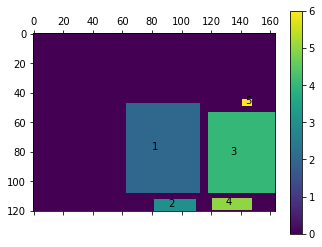

In [64]:
_ = imze.list_regions()

In [65]:
spectra3_orig = imze.get_region_array(3, makeNullLine=True)
spectra3 = imze.normalize_region_array(spectra3_orig, normalize="tic")

Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Found region 3 with shape (47, 56, 8000)
Found region 3 with shape (47, 56, 8000)
Fetching region spectra
Fetching region spectra




100.18129684068533 71
171.14554214858265 1784
211.08948860931525 1
274.4048931055829 1
378.51411526387534 315
378.93905086452145 460


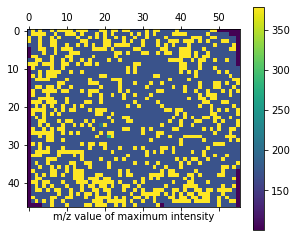

2632 0.0 1275.9089 645.5209157140785


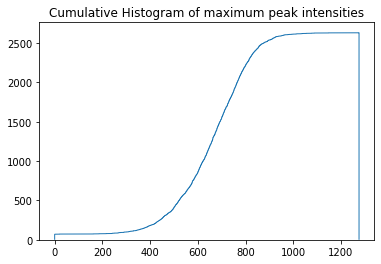

In [66]:
imze.list_highest_peaks(spectra3, counter=True)

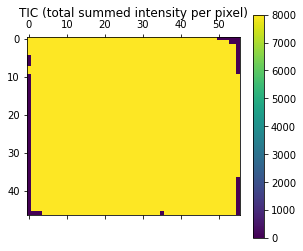

In [67]:
imze.plot_tic(spectra3)

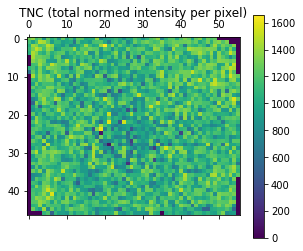

In [68]:
imze.plot_tnc(spectra3)

In [69]:
def plot_coords(arr, coords, valRange, xvals):
    for x in coords:
        plt.plot(xvals, arr[x], label=str(x))
        
    plt.xlim(valRange)
    plt.gca().relim()
    plt.gca().autoscale_view()
    plt.legend()
    
def plot_coords_vec(arr, valRange, xvals):       
    plt.plot(xvals[valRange], arr[valRange], label="(00, 00)")
    plt.legend()

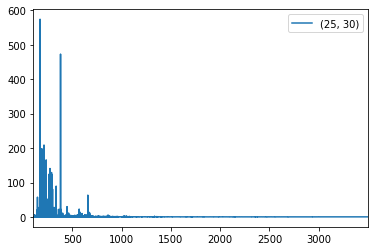

In [70]:
plot_coords(spectra3, [(25,30)], (min(imze.mzValues),max(imze.mzValues)), imze.mzValues)

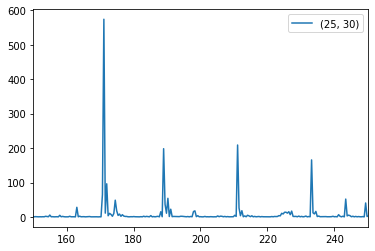

In [71]:
plot_coords(spectra3, [(25,30)], (150,250), imze.mzValues)

In [72]:
spectra3_peaks, spectra3_peaks_mz = imze.to_called_peaks(spectra3, imze.mzValues, 1, reduce_peaks=False)

100.18129684068533 3499.241166408772
100.0 3499.0
(47, 56, 3400)
(3400,)


KeyboardInterrupt: 

Exception ignored in: 'ms_peak_picker._c.peak_statistics.curve_reg_dv'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in inv
KeyboardInterrupt: 


Identified peaks for 3392 of 3400 fields
Returning Peaks


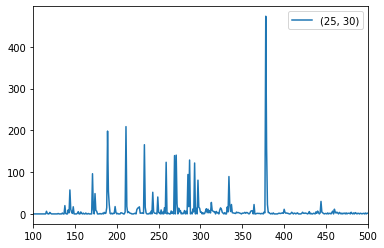

In [ ]:
plot_coords(spectra3_peaks, [(25,30)], (min(spectra3_peaks_mz),500), spectra3_peaks_mz)

(0.0, 200.0)

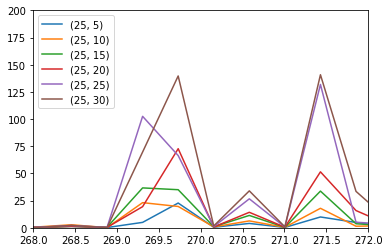

In [ ]:
plot_coords(spectra3, [(25,5), (25,10), (25,15), (25,20), (25,25), (25,30), ], (268,272), imze.mzValues)
plt.ylim(0, 200)

In [ ]:
def plot_int_coords(arr, coords, valRange, xvals):
    colors = cm.get_cmap('viridis', len(coords))
    for i,x in enumerate(coords):        
        xnew = np.arange(min(xvals), max(xvals), 0.1)
  
        f = scipy.interpolate.Akima1DInterpolator(xvals, arr[x])#, kind="cubic")
        #ynew = scipy.interpolate.Akima1DInterpolator(xvals, arr[x], xnew)
        ynew = f(xnew)

        plt.plot(xvals, arr[x], 'o', xnew, ynew, "-", label=str(x), c=colors(i))
        
        
    plt.xlim(valRange)
    plt.gca().relim()
    plt.gca().autoscale_view()
    plt.legend()

(0.0, 200.0)

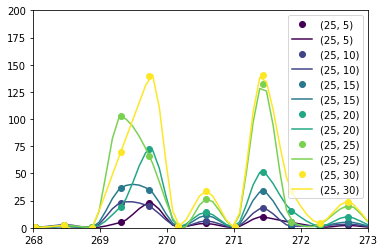

In [ ]:
plot_int_coords(spectra3, [(25,5), (25,10), (25,15), (25,20), (25,25), (25,30), ], (268,273), imze.mzValues)
plt.ylim(0, 200)

In [ ]:
spectra3_int, spectra3_int_mz = imze.interpolate_data(spectra3, imze.mzValues, 0.1)

(0.0, 200.0)

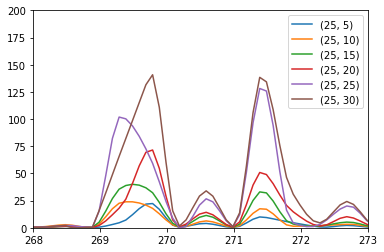

In [ ]:
plot_coords(spectra3_int, [(25,5), (25,10), (25,15), (25,20), (25,25), (25,30), ], (268,273), spectra3_int_mz)
plt.ylim(0, 200)

In [ ]:
#http://wordaligned.org/articles/slicing-a-list-evenly-with-python
def split_blocks(xs, n):
    '''Split the list, xs, into n evenly sized chunks'''
    L = len(xs)
    assert 0 < n <= L
    s, r = divmod(L, n)
    t = s + 1
    return ([xs[p:p+t] for p in range(0, r*t, t)] +
            [xs[p:p+s] for p in range(r*t, L, s)])

In [ ]:
def estimateNoiseSimple(xIn, blocks = 100):
    
    t = range(0, len(xIn))
    
    xint = split_blocks(xIn, blocks)
    kurt = np.array([scipy.stats.kurtosis(x)-3 for x in xint])
    
    kurt[np.isnan(kurt)] = math.inf
    
    kurt_sd = np.array([np.std(x) for x in xint])
    noise_skalar = np.mean(kurt_sd[kurt < 1])
    
    noise = np.array([noise_skalar] * len(xIn))
    
    return noise
    

In [ ]:
def peakPickSimple(xIn, SNR=6, window=5, blocks=100):
    
    noise = estimateNoiseSimple(xIn, blocks=blocks)
    
    #maxs = locmax(xIn, halfWindow = window // 2)
    maxs = argrelextrema(xIn, np.greater, order=window//2)[0]
    #print(maxs)
    
    noiseAccs = [ix for ix,x in enumerate(xIn) if x/noise[ix] >= SNR]
    
    peaks = set(maxs).intersection(noiseAccs)
    
    return np.array(sorted(peaks))

In [ ]:
import progressbar

def makeProgressBar():
    return progressbar.ProgressBar(widgets=[
        progressbar.Bar(), ' ', progressbar.Percentage(), ' ', progressbar.AdaptiveETA()
        ])

In [ ]:
def call_peaks(region, masses, accepted_difference=1.0):

    calledPeaks = {}
    amasses = np.array(masses)
    peakCount = np.zeros((region.shape[0], region.shape[1]))
    outArray = np.zeros((region.shape[0], region.shape[1], region.shape[2]))
    bar = makeProgressBar()

    for i in bar(range(0, region.shape[0])):
        for j in range(0, region.shape[1]):

            ijSpec = region[i,j]

            idc = peakPickSimple(region[i,j])
            
            if len(idc) > 0:
                calledPeaks[i,j] = amasses[idc]
                peakCount[i,j] = len(idc)
                
                outArray[i,j,idc] = region[i,j,idc]
            else:
                outArray[i,j] = 0
            
    plt.imshow(peakCount)
    
    return outArray

    
    

835
[105.68129684068502, 108.68129684068485, 110.48129684068475, 114.68129684068451, 116.78129684068439, 117.58129684068435, 119.78129684068422, 120.58129684068417, 121.8812968406841, 123.581296840684, 127.88129684068376, 128.68129684068373, 130.78129684068358, 132.4812968406835, 134.58129684068336, 135.88129684068332, 138.88129684068315, 139.6812968406831, 142.68129684068293, 143.98129684068283, 144.78129684068278, 145.88129684068275, 146.8812968406827, 147.78129684068261, 148.58129684068257, 149.38129684068252, 150.68129684068248, 152.0812968406824, 152.88129684068235, 154.18129684068225, 154.9812968406822, 155.78129684068216, 157.18129684068208, 157.98129684068203, 159.081296840682, 160.98129684068186, 161.78129684068182, 163.08129684068177, 163.88129684068173, 165.18129684068163, 166.88129684068156, 171.18129684068128, 171.98129684068124, 173.0812968406812, 174.5812968406811, 175.78129684068102, 176.681296840681, 179.18129684068083, 180.0812968406808, 180.88129684068076, 182.181296

(0.0, 200.0)

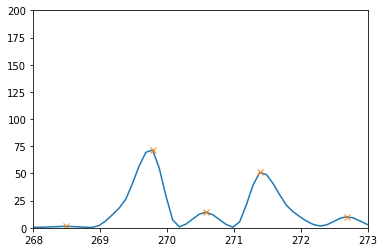

In [ ]:
spectrum = spectra3_int[(25,20)]
masses = spectra3_int_mz

#idc = scipy.signal.find_peaks_cwt(spectrum, np.arange(1,15))
idc = peakPickSimple(spectrum)
print(len(idc))
print([masses[i] for i in idc][:150])

plt.plot(masses, spectrum)
plt.plot(np.array(masses)[idc], spectrum[idc], "x")
plt.xlim(268, 273)
plt.ylim(0, 200)

(0.0, 200.0)

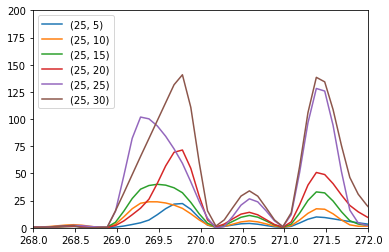

In [ ]:
plot_coords(spectra3_int, [(25,5), (25,10), (25,15), (25,20), (25,25), (25,30), ], (268,272), spectra3_int_mz)
plt.ylim(0, 200)

<ipython-input-20-b67532391425>:9: RuntimeWarning: invalid value encountered in double_scalars
  noiseAccs = [ix for ix,x in enumerate(xIn) if x/noise[ix] >= SNR]



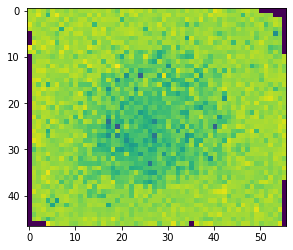

In [ ]:
spectra3_int_called = call_peaks(spectra3_int, spectra3_int_mz)

(0.0, 200.0)

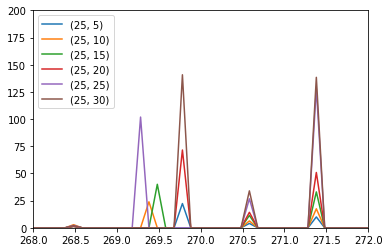

In [ ]:
plot_coords(spectra3_int_called, [(25,5), (25,10), (25,15), (25,20), (25,25), (25,30), ], (268,272), spectra3_int_mz)
plt.ylim(0, 200)

(0.0, 200.0)

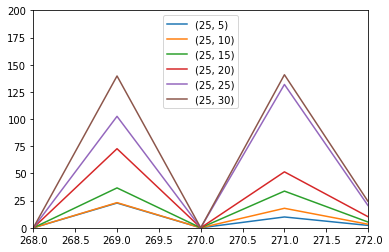

In [ ]:
plot_coords(spectra3_peaks, [(25,5), (25,10), (25,15), (25,20), (25,25), (25,30), ], (268,272), spectra3_peaks_mz)
plt.ylim(0, 200)

In [ ]:
spectra3_peaks2 = imze.to_reduced_peaks(spectra3_peaks, spectra3_peaks_mz)

/mnt/f/dev/git/pyIMS/pIMZ/imzml.py:1054: RuntimeWarning: invalid value encountered in double_scalars
  allMassMeanDisp.append((k, massMean, massMean/massVar))

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Returning 660 highly-variable masses.
Identified 660 HV indices


(0.0, 200.0)

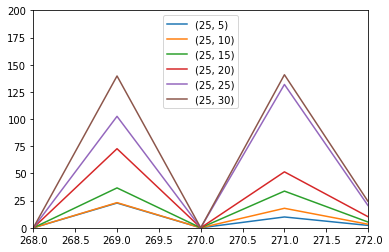

In [ ]:
plot_coords(spectra3_peaks2, [(25,5), (25,10), (25,15), (25,20), (25,25), (25,30), ], (268,272), spectra3_peaks_mz)
plt.ylim(0, 200)

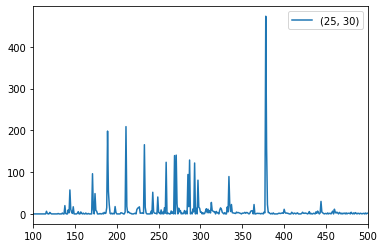

In [ ]:
plot_coords(spectra3_peaks2, [(25,30)], (min(spectra3_peaks_mz),500), spectra3_peaks_mz)

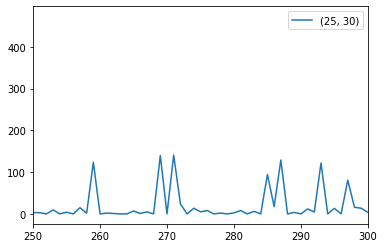

In [ ]:
plot_coords(spectra3_peaks2, [(25,30)], (250,300), spectra3_peaks_mz)

In [ ]:
spectra3_peaks.shape

(47, 56, 3400)

In [ ]:
spectra3_hvp = imze.to_reduced_peaks(spectra3, imze.mzValues, topn=2000)


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Returning 2000 highly-variable masses.
Identified 2000 HV indices


(0.0, 200.0)

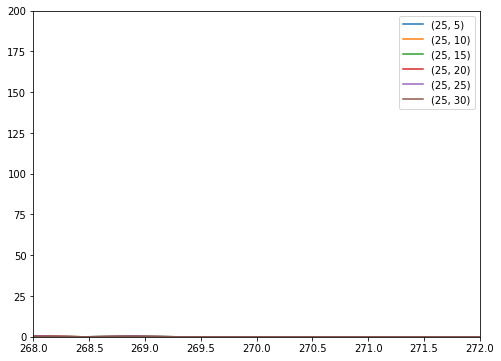

In [144]:
plot_coords(spectra3_hvp, [(25,5), (25,10), (25,15), (25,20), (25,25), (25,30), ], (268,272), imze.mzValues)
plt.ylim(0, 200)

In [145]:
spec = SpectraRegion(spectra3_peaks2, spectra3_peaks_mz)
#spec = SpectraRegion(spectra3_int_called, spectra3_int_mz)

In [ ]:
from scipy.stats import multivariate_normal
import math

singleMass = np.zeros(spectra3_peaks2.shape)
middle = singleMass.shape[0]/2, singleMass.shape[1]/2

for i in range(singleMass.shape[0]):
    for j in range(singleMass.shape[1]):

        for mass in [120, 250, 500]:

            dist = math.sqrt((i-middle[0])*(i-middle[0]) + (j-middle[1])*(j-middle[1]))

            singleMass[i,j,mass] = (1/math.sqrt(1+dist)) * 250

singleMass = singleMass / np.max(np.max(singleMass))

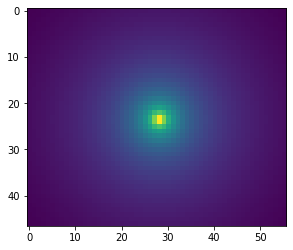

In [ ]:
plt.imshow(singleMass[:,:,120])

In [146]:
spec = SpectraRegion(spectra3_peaks2, spectra3_peaks_mz)

In [127]:
#spec = SpectraRegion(spectra3_int_called, spectra3_int_mz)

In [128]:
#spec = SpectraRegion(singleMass, spectra3_peaks_mz)

In [148]:
spec.calculate_similarity(mode="spectra_log")

2021-10-08 19:59:04,291  SpectraRegion  INFO: dimensions inputarray: 3400
2021-10-08 19:59:04,292  SpectraRegion  INFO: Creating C++ obj
2021-10-08 19:59:04,293  SpectraRegion  INFO: 3400 (47, 56, 3400)
2021-10-08 19:59:04,293  SpectraRegion  INFO: dimensions 3400
2021-10-08 19:59:04,294  SpectraRegion  INFO: input dimensions (47, 56, 3400)
2021-10-08 19:59:04,295  SpectraRegion  INFO: Switching to dot mode
2021-10-08 19:59:04,307  SpectraRegion  INFO: Starting calc similarity c++
2021-10-08 19:59:05,870  SpectraRegion  INFO: outclust dimensions (2632, 2632)
2021-10-08 19:59:05,870  SpectraRegion  INFO: Calculating spectra similarity
2021-10-08 19:59:05,898  SpectraRegion  INFO: Calculating spectra similarity done


array([[1.        , 0.89664537, 0.9907573 , ..., 0.9561968 , 0.972787  ,
        0.        ],
       [0.89664537, 1.        , 0.87814516, ..., 0.83139807, 0.86222893,
        0.        ],
       [0.9907573 , 0.87814516, 1.        , ..., 0.98223203, 0.99036545,
        0.        ],
       ...,
       [0.9561968 , 0.83139807, 0.98223203, ..., 1.        , 0.9871971 ,
        0.        ],
       [0.972787  , 0.86222893, 0.99036545, ..., 0.9871971 , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [162]:
spec.segment(method="KMEANS", number_of_regions=20)

2021-10-08 21:39:14,097  SpectraRegion  INFO: Calculating clusters
2021-10-08 21:39:15,438  SpectraRegion  INFO: Calculating clusters done
2021-10-08 21:39:15,446  SpectraRegion  INFO: Calculating clusters saved


array([[18,  4, 18, ...,  6,  6,  6],
       [18, 14,  8, ...,  6,  6,  6],
       [ 8, 13, 13, ...,  5,  8,  6],
       ...,
       [ 6,  2, 18, ...,  8, 11,  6],
       [ 6,  8,  2, ...,  8, 11,  6],
       [ 6,  6,  6, ..., 17, 17,  6]], dtype=int16)

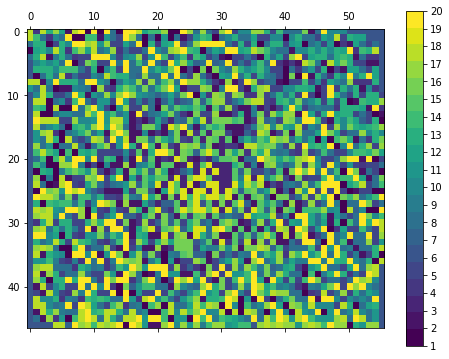

In [163]:
spec.plot_segments()

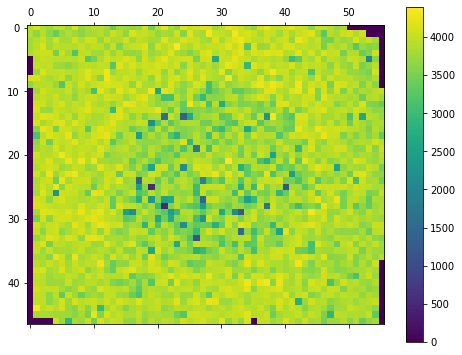

array([[3946.76802599, 4132.14339578, 3891.11858916, ...,    0.        ,
           0.        ,    0.        ],
       [3894.36421442, 3651.87568069, 3929.77926338, ...,    0.        ,
           0.        ,    0.        ],
       [3807.2454958 , 3906.44820881, 4050.02937281, ..., 4027.98162079,
        3809.58292103,    0.        ],
       ...,
       [   0.        , 4333.21276283, 3941.96392572, ..., 3826.3951807 ,
        3655.79911196,    0.        ],
       [   0.        , 3827.27292001, 3844.11054397, ..., 3989.67690384,
        3318.45246947,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., 3676.72556031,
        3791.73766708,    0.        ]])

In [151]:
spec.plot_tic()

2021-10-08 19:59:19,442  SpectraRegion  INFO: Processing Mass 210.5 with best existing mass 210.0


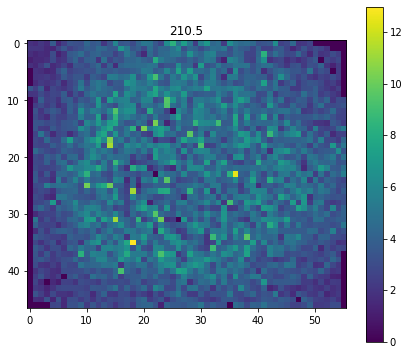

array([[1.83082843, 1.63468802, 2.08081603, ..., 0.        , 0.        ,
        0.        ],
       [2.07659507, 2.0355823 , 1.97872245, ..., 0.        , 0.        ,
        0.        ],
       [1.73289776, 1.46204972, 1.69713485, ..., 2.99563169, 2.41580343,
        0.        ],
       ...,
       [0.        , 3.33609819, 2.47252846, ..., 1.85089684, 2.21982408,
        0.        ],
       [0.        , 1.75646996, 1.62813258, ..., 2.58915162, 1.91575098,
        0.        ],
       [0.        , 0.        , 0.        , ..., 3.0589776 , 3.03954148,
        0.        ]])

In [152]:
spec.mass_heatmap(210.5)

2021-10-08 19:59:22,143  SpectraRegion  INFO: Processing Mass 269.3 with best existing mass 269.0


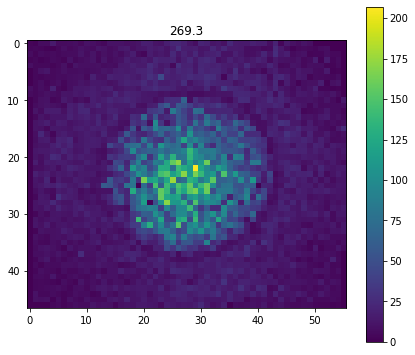

array([[ 3.084512  ,  1.78050852,  7.09277582, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.69868112,  4.83995342,  3.88481951, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.66828394,  3.0258131 ,  6.97137785, ...,  5.45831299,
         4.89301395,  0.        ],
       ...,
       [ 0.        , 10.33577824,  4.74342299, ...,  5.70335197,
         5.85854483,  0.        ],
       [ 0.        ,  9.30617142,  8.57641029, ...,  6.84727764,
         5.30167484,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  2.22005939,
         2.73291922,  0.        ]])

In [153]:
spec.mass_heatmap(269.3)

2021-10-08 19:59:25,605  SpectraRegion  INFO: Processing Mass 608 with best existing mass 608.0


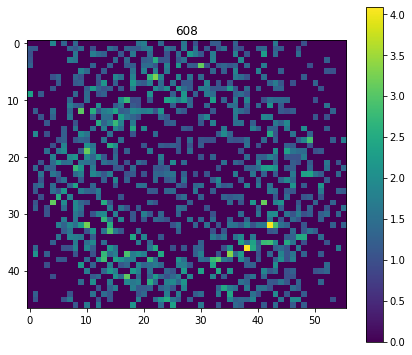

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.17393136, 1.15485251, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.0233351 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.25751936, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.07819843, 0.        , ..., 1.0003736 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [154]:
spec.mass_heatmap(608)

In [155]:
elem_matrix, idx2ij = spec.prepare_elem_matrix()

Elem Matrix (2632, 3400)


In [88]:
import seaborn as sns
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

has labels
(47, 56)
(2632,)


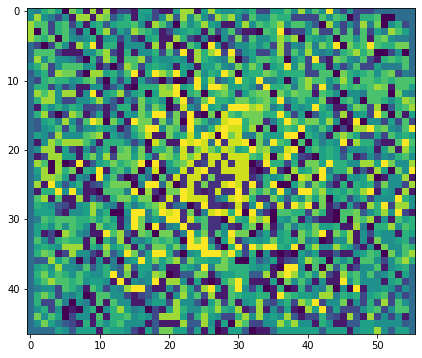

In [156]:
kmeans = cluster.KMeans(n_clusters=15, random_state=0).fit(elem_matrix)

if hasattr(kmeans, 'labels_'):
    print("has labels")
    y_pred = kmeans.labels_.astype(int)
else:
    y_pred = kmeans.predict(elem_matrix)

clusts = np.zeros((spec.region_array.shape[0], spec.region_array.shape[1]))
print(clusts.shape)
print(y_pred.shape)

for idx, ypred in enumerate(y_pred):
    clusts[idx2ij[idx]] = y_pred[idx]

plt.imshow(clusts)

In [140]:
def get_overall_centroid(spectra):
    #Calculate the overall centroid
    n = spectra.shape[0]*spectra.shape[1]
    return np.sum(spectra, axis=(0,1))/n

In [164]:
matrix=np.copy(spec.region_array)
matrix_mz = np.copy(spec.idx2mass)
segmented=np.copy(spec.segmented)

In [142]:
matrix.shape

(47, 56, 33991)

In [92]:
matrix_global_centroid = get_overall_centroid(matrix)

In [93]:
def get_segments(image):
    cluster2coords = defaultdict(list)
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):

            clusterID = int(image[i, j])
            cluster2coords[clusterID].append((i,j))

    return cluster2coords

In [94]:
matrix_segments = get_segments(segmented)

for x in sorted(matrix_segments):
    print(x, len(matrix_segments[x]))

1 1392
2 322
3 784
4 26
5 108


In [109]:
def get_seg_centroids(segments, spectra_orig):
    #Calculate the segment centroids
    seg_cent = defaultdict(lambda : np.zeros( (spectra_orig.shape[2],)))
    for s in sorted(segments):

        allCoordIntensities = []
        
        for coord in segments[s]:
            #allCoordIntensities.append(spectra_orig[coord])
            seg_cent[s] += spectra_orig[coord]

        n = len(segments[s])
        seg_cent[s] = seg_cent[s] / n
        
    return seg_cent

In [110]:
def get_seg_centroids_median(segments, spectra_orig):
    #Calculate the segment centroids
    seg_cent = defaultdict(lambda : np.zeros( (spectra_orig.shape[2],)))
    for s in sorted(segments):
        
        seglist = []
        for coord in segments[s]:
            seglist.append( spectra_orig[coord] )

        seg_cent[s] = np.median(seglist, axis=0)

    assert(False)
        
    return seg_cent

In [111]:
matrix_seg_centroids = get_seg_centroids(matrix_segments, matrix)


In [112]:


def get_all_s(segments, spectra_orig, seg_centroids):
    s_list = list()
    n = spectra_orig.shape[0]*spectra_orig.shape[1]
    K = np.max(list(segments.keys()))
    

    for mz in range(spectra_orig.shape[2]):
        current_s = 0
        seenCoords = 0
        for seg in segments:
            seg_centroid = seg_centroids[seg]
            coordinates = segments[seg]
            for coord in coordinates:
                seenCoords += 1
                current_s += (spectra_orig[coord][mz]-seg_centroid[mz])**2

        s_list.append(math.sqrt((1.0/(n-K))*current_s))

        print(seenCoords)
    return s_list


def get_all_s_vec(segments, spectra_orig, seg_centroids):
    n = spectra_orig.shape[0]*spectra_orig.shape[1]
    K = len(segments.keys())
    seenCoords = 0

    curS = np.zeros((spectra_orig.shape[2],))
    
    for seg in segments:
        seg_centroid = seg_centroids[seg]
        coordinates = segments[seg]
        for coord in coordinates:
            seenCoords += 1
            curS += np.multiply(spectra_orig[coord]-seg_centroid, spectra_orig[coord]-seg_centroid)
                
    curS = (1.0/(n-K)) * curS
    curS = np.sqrt(curS)

    print(seenCoords, "of",n )

    return curS


In [ ]:
#svec_norm = get_all_s(matrix_segments, matrix, matrix_seg_centroids)

In [113]:
def get_shr_centroids(segments, spectra_orig, seg_centroids, overall_centroid, delta=0.2):
    #Calculate the segment shrunken centroids
    seg_shr_cent = dict()
    seg_tstat_cent = dict()
    n = spectra_orig.shape[0]*spectra_orig.shape[1]
    K = np.max(list(segments.keys()))
    s_list = get_all_s_vec(segments, spectra_orig, seg_centroids)
    s_0 = np.median(s_list)

    ovrAllCentroid = np.copy(overall_centroid)
    ovrAllCentroid[ovrAllCentroid<=0] = 0
    ovrAllCentroid[ovrAllCentroid>0] = 1

    print("Selected fields OvrAll Centroid:", sum(ovrAllCentroid), "of", len(ovrAllCentroid))

        
    for seg in sorted(segments):
        seg_centroid = seg_centroids[seg]
        coordinates = segments[seg]

        print("seg centroid", seg_centroid)

        m = math.sqrt((1/len(coordinates)) + (1/n))
        shr_centroid = np.zeros(seg_centroid.shape)
        tstat_centroid = np.zeros(seg_centroid.shape)

        segCentroid = np.copy(seg_centroids[seg])
        segCentroid[segCentroid <= 0] = 0
        segCentroid[segCentroid > 0] = 1
        print("Selected fields Seg Centroids", seg, ":", sum(segCentroid), "of", len(segCentroid), "with s0=", s_0, "and m=", m)


        for mz in range(spectra_orig.shape[2]):

            d_ik   = (seg_centroid[mz] - overall_centroid[mz])/(m*(s_list[mz]+s_0))
            dp_ik  = np.sign(d_ik)*max(0, (abs(d_ik)-delta)) #where + means positive part (t+ = t if t  0 and zero otherwise)
            #only d_ik > delta will result in change!

            tstat_centroid[mz] = dp_ik
            #shr_centroid[mz] = seg_centroid[mz] + m*(s_list[mz]+s_0)*dp_ik  was used, but checking literature it should be
            shr_centroid[mz] = overall_centroid[mz] + m*(s_list[mz]+s_0)*dp_ik 
            

            if shr_centroid[mz] < 0:
                pass
                # it's a centroid and therefore a possible element of class spectrum!
                #shr_centroid[mz] = 0

            #if shr_centroid[mz] < 0 and seg_centroid[mz] > 0:
            #    print(seg, mz, seg_centroid[mz], d_ik, dp_ik, shr_centroid[mz])
            
        shr_centroid = np.nan_to_num(shr_centroid, copy=True, nan=0.0, posinf=0.0, neginf=0.0)
        seg_shr_cent[seg] = shr_centroid
        seg_tstat_cent[seg] = tstat_centroid


    allShrCentroid = np.zeros((spectra_orig.shape[2],))
    for seg in sorted(seg_shr_cent):
        allShrCentroid += seg_shr_cent[seg]

        shrCentroid = np.copy(seg_shr_cent[seg])
        shrCentroid[shrCentroid <= 0] = 0
        shrCentroid[shrCentroid > 0] = 1

        print("Selected fields Shr Centroids", seg, ":", sum(shrCentroid), "of", len(shrCentroid))

        fiveNumSummary = (
                            np.min(seg_tstat_cent[seg]),
                            np.quantile(seg_tstat_cent[seg], 0.25),
                            np.median(seg_tstat_cent[seg]),
                            np.quantile(seg_tstat_cent[seg], 0.75),
                            np.max(seg_tstat_cent[seg]),
                            np.mean(seg_tstat_cent[seg])
                            )
        print("t stats:", fiveNumSummary)

    allShrCentroid[allShrCentroid <= 0] = 0
    allShrCentroid[allShrCentroid > 0] = 1

    print("Selected fields over all Shr Centroids", sum(allShrCentroid), "of", len(allShrCentroid))

    return seg_shr_cent, seg_tstat_cent

In [114]:
matrix_shr_centroids, matrix_tstat_centroids = get_shr_centroids(matrix_segments, matrix, matrix_seg_centroids, matrix_global_centroid, delta=0.01)

2632 of 2632
Selected fields OvrAll Centroid: 3.0 of 3400
seg centroid [0. 0. 0. ... 0. 0. 0.]
Selected fields Seg Centroids 1 : 3.0 of 3400 with s0= 0.0 and m= 0.03314106235961885
seg centroid [0. 0. 0. ... 0. 0. 0.]
Selected fields Seg Centroids 2 : 3.0 of 3400 with s0= 0.0 and m= 0.05903837118212396
seg centroid [0. 0. 0. ... 0. 0. 0.]
Selected fields Seg Centroids 3 : 3.0 of 3400 with s0= 0.0 and m= 0.04068721437759135
seg centroid [0. 0. 0. ... 0. 0. 0.]
Selected fields Seg Centroids 4 : 3.0 of 3400 with s0= 0.0 and m= 0.19708241339922977
seg centroid [0. 0. 0. ... 0. 0. 0.]
Selected fields Seg Centroids 5 : 3.0 of 3400 with s0= 0.0 and m= 0.09817941978330134
Selected fields Shr Centroids 1 : 3.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 2 : 3.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 3 : 3.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 4 : 3.0 of 3400
t stats: (nan, nan, nan

<ipython-input-113-29675fb0e293>:35: RuntimeWarning: invalid value encountered in double_scalars
  d_ik   = (seg_centroid[mz] - overall_centroid[mz])/(m*(s_list[mz]+s_0))


In [115]:
plt.rcParams["figure.figsize"] = (8,6)

In [116]:
def plot_segment_centroids(matrix_shr_centroids, matrix_global_centroid, matrix_segments, matrix, matrix_mz, ylim, addSpecs=[], xlim=(-500, 1000)):
    oldFigSize = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = (20,30)

    fig, ax = plt.subplots(1, len(matrix_shr_centroids)+1+ len(addSpecs))
    for sidx, seg in enumerate(sorted(matrix_shr_centroids)):

        print(seg, len(matrix_shr_centroids[seg]), sum(matrix_shr_centroids[seg]), sum(matrix_shr_centroids[seg]<0))

        usePixels = matrix_segments[seg]
        if len(usePixels) > 200:
            usePixels = random.sample(list(matrix_segments[seg]), 200)

        for px in usePixels:
            ax[sidx].plot(matrix[px], matrix_mz, alpha=0.01, color="blue")

        ax[sidx].plot(matrix_shr_centroids[seg], matrix_mz, color="black")
        ax[sidx].set_title("Segment: {}".format(seg))
        ax[sidx].set_xlim(xlim)
        ax[sidx].set_ylim(ylim)

    ax[len(matrix_shr_centroids)].plot(matrix_global_centroid,matrix_mz, color="black")
    ax[len(matrix_shr_centroids)].set_title("Segment: {}".format("global"))
    ax[len(matrix_shr_centroids)].set_xlim(xlim)
    ax[len(matrix_shr_centroids)].set_ylim(ylim)

    for asi, addSpec in enumerate(addSpecs):

        ax[len(matrix_shr_centroids)+1+asi].plot(matrix[addSpec],matrix_mz, color="black")
        ax[len(matrix_shr_centroids)+1+asi].set_title("Segment: {}".format(addSpec))
        ax[len(matrix_shr_centroids)+1+asi].set_xlim(xlim)
        ax[len(matrix_shr_centroids)+1+asi].set_ylim(ylim)

    plt.show()
    plt.close()

    plt.rcParams["figure.figsize"] = oldFigSize


1 3400 0.7181723586341069 0
2 3400 1.140414297042121 0
3 3400 0.8897219056677754 0
4 3400 2.2058783135334368 0
5 3400 1.5254471237987564 0


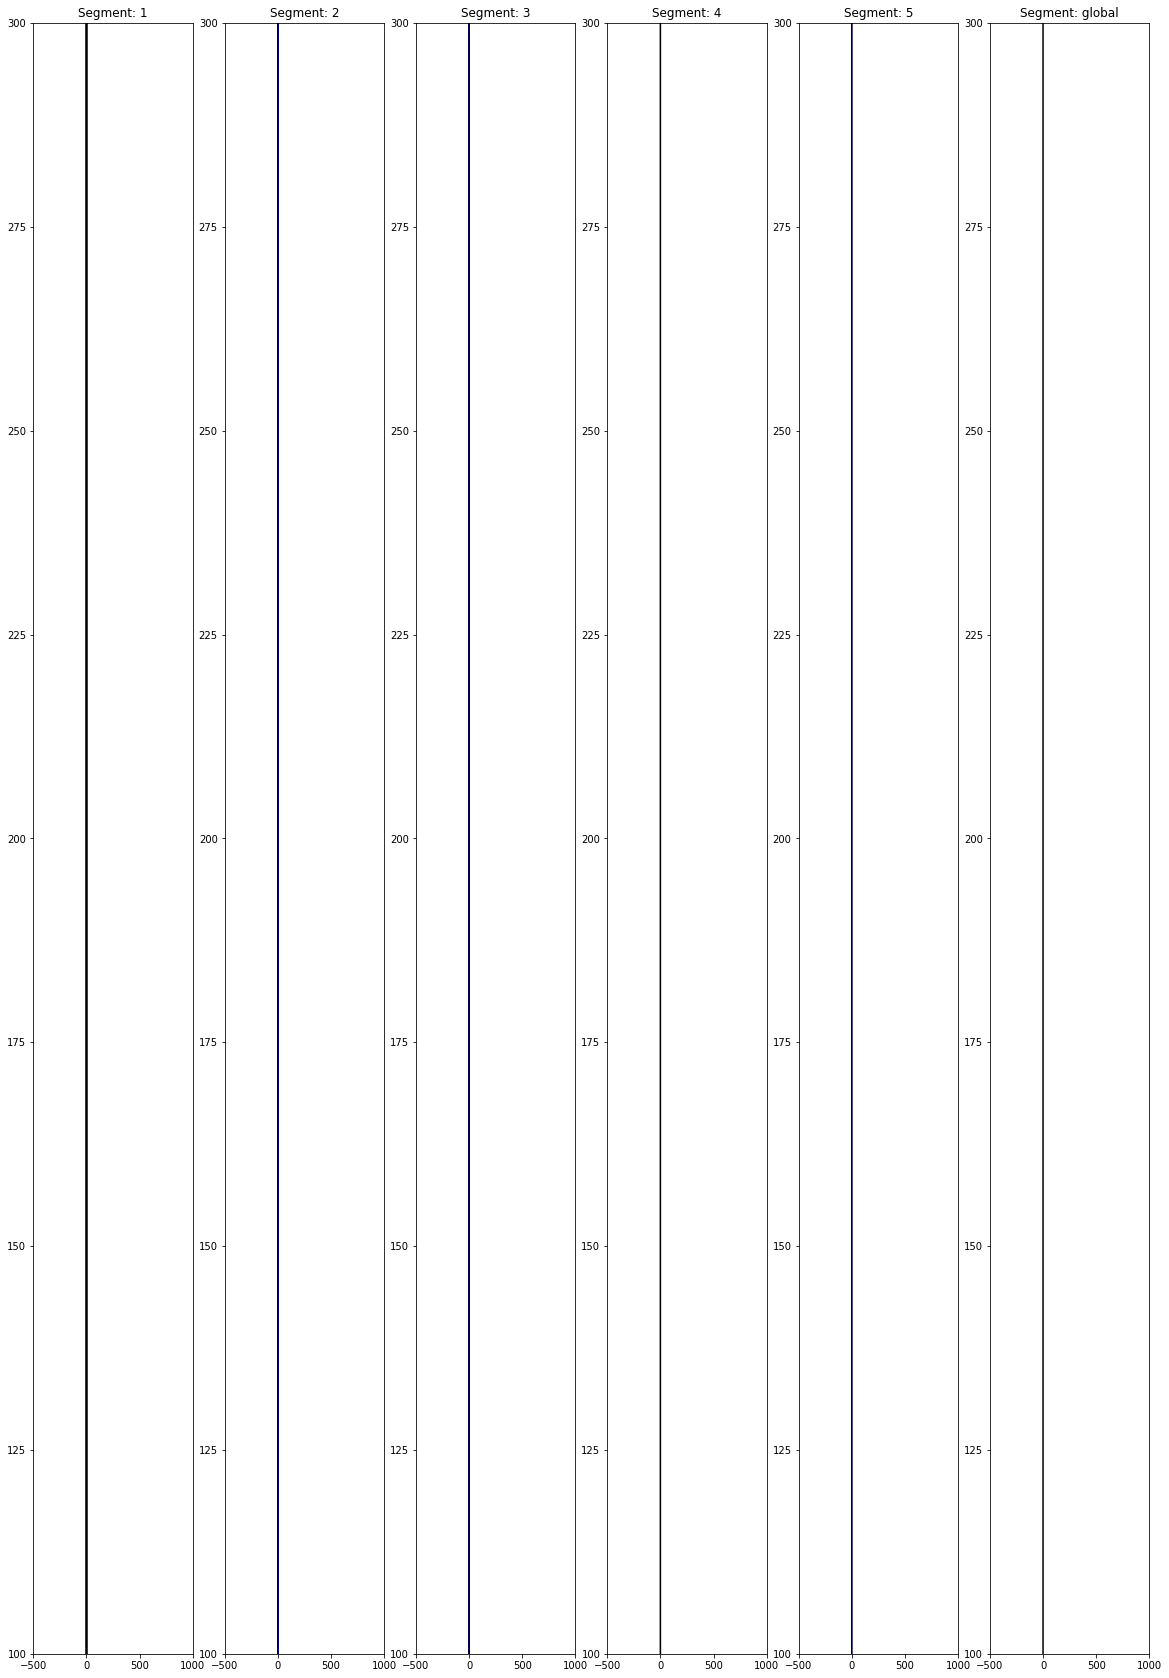

In [117]:
plot_segment_centroids(matrix_shr_centroids, matrix_global_centroid, matrix_segments, matrix, matrix_mz, (100, 300))

In [118]:
def distance_tibschirani(matrix, pxCoord, centroid, sqSStats, centroidProbability):
    specDiff = matrix[pxCoord]-centroid
    sigma = np.divide(np.multiply(specDiff, specDiff), sqSStats)
    sigma = np.nan_to_num(sigma, copy=True, nan=0.0, posinf=0.0, neginf=0.0)
    #sigma = np.multiply(sigma, allShrCentroid)
    sigma = sum(sigma)
    sigma = sigma - 2*math.log(centroidProbability)

    return sigma

In [119]:
def get_new_clusters_func(orig_segments, segments, spectra_orig, seg_centroids, shr_seg_centroids, print_area=5, distance_func=None):   

    assert(not distance_func is None)

    #Calculate the segment membership probability
    new_matrix = np.zeros((spectra_orig.shape[0], spectra_orig.shape[1]))
    n = spectra_orig.shape[0] * spectra_orig.shape[1]
    s_list = get_all_s_vec(segments, spectra_orig, seg_centroids)
    s_0 = np.median(s_list)
    sigmas = list()

    sSum = s_list+s_0
    sSumSq = np.multiply(sSum, sSum)
    oldSegmentCount = 0

    allMaxSigmas = []
    takenClusters = []

    printXlow = (spectra_orig.shape[0]/2) - print_area
    printXhi =  (spectra_orig.shape[0]/2) + print_area

    printYlow = (spectra3_orig.shape[1]/2)-print_area
    printYhi =  (spectra3_orig.shape[1]/2)+print_area

    allShrCentroid = np.zeros((spectra_orig.shape[2],))
    for seg in sorted(shr_seg_centroids):
        allShrCentroid += shr_seg_centroids[seg]

    allShrCentroid[allShrCentroid <= 0] = 0
    allShrCentroid[allShrCentroid > 0] = 1

    print("Total field considered", sum(allShrCentroid), "of", len(allShrCentroid))

    for seg in sorted(segments):
        print("Segment", seg, "elements", len(segments[seg]), "of all", n, len(segments[seg])/n)
            
    for i in range(spectra_orig.shape[0]):
        for j in range(spectra_orig.shape[1]):
            spectrum = spectra_orig[(i,j)]
            sigmas = dict()

            for seg in sorted(segments):
                shr_seg_centroid = shr_seg_centroids[seg]
                coordinates = segments[seg]
                
                sigma = distance_func(spectra_orig, (i,j), shr_seg_centroid, sSumSq, len(coordinates)/n)
                
                sigmas[seg] = sigma

            allMaxSigmas += [sigmas[seg] for seg in segments]
 
            #this very likely becomes 0 and SHOULD NOT be used for class assignment!
            summed_probabilities = sum([math.exp(-0.5*sigmas[cluster]) for cluster in sorted(sigmas)])

            if (printXlow<=i<=printXhi and printYlow<=j<=printYhi) or (i,j) in [(22,26)]:# or lower_probability == 0:
                for seg in sorted(sigmas):
                    print("[PS]", i,j, seg, sigmas[seg], math.exp(-0.5*sigmas[seg]),2*math.log(len(segments[seg])/n))
                #print([(cluster,math.exp(-0.5*sigmas[cluster])/summed_probabilities) for cluster in sorted(sigmas)], lower_probability)

            minSigma = min(sigmas.values())
            if len(sigmas) == 0:
                print("sigmas is empty!", sigmas, (i,j))


            minSigmaClass = [x for x in sigmas if sigmas[x] == minSigma]

            if len(minSigmaClass) == 0:
                print("minSigmaClass Empty", i, j)
                print(sigmas)
                print(minSigma)

            minSigmaClass = minSigmaClass[0]

            new_matrix[i][j] = minSigmaClass
            takenClusters.append(minSigmaClass)

    plt.hist(takenClusters, bins=len(set(takenClusters)))
    plt.show()
    plt.close()

    print("Old segments taken:", oldSegmentCount, "of", spectra_orig.shape[0]*spectra_orig.shape[1] )

    return new_matrix, allMaxSigmas

In [120]:
def plotTStatistics( tStat, mzValues, plotRange=None ):

    plt.figure()

    for x in tStat:
        plt.plot(mzValues, tStat[x], label=str(x))

    if not plotRange is None:
        plt.xlim(plotRange)

    plt.legend()
    plt.show()
    plt.close()

In [121]:
matrix = np.copy(spec.region_array)
shr_segmented = np.copy(spec.segmented)

matrix_global_centroid = get_overall_centroid(matrix)
matrix_segments = get_segments(shr_segmented)

for x in sorted(matrix_segments):
    print("SegLen", x, len(matrix_segments[x]))

matrix_seg_centroids = get_seg_centroids(matrix_segments, matrix)
matrix_shr_centroids, matrix_tstat_centroids = get_shr_centroids(matrix_segments, matrix, matrix_seg_centroids, matrix_global_centroid, delta=5)


#plot_segment_centroids(matrix_shr_centroids, matrix_global_centroid, matrix_segments, matrix, (100, 300))


SegLen 1 1392
SegLen 2 322
SegLen 3 784
SegLen 4 26
SegLen 5 108
2632 of 2632
Selected fields OvrAll Centroid: 3.0 of 3400
seg centroid [0. 0. 0. ... 0. 0. 0.]
Selected fields Seg Centroids 1 : 3.0 of 3400 with s0= 0.0 and m= 0.03314106235961885
seg centroid [0. 0. 0. ... 0. 0. 0.]
Selected fields Seg Centroids 2 : 3.0 of 3400 with s0= 0.0 and m= 0.05903837118212396
seg centroid [0. 0. 0. ... 0. 0. 0.]
Selected fields Seg Centroids 3 : 3.0 of 3400 with s0= 0.0 and m= 0.04068721437759135
seg centroid [0. 0. 0. ... 0. 0. 0.]
Selected fields Seg Centroids 4 : 3.0 of 3400 with s0= 0.0 and m= 0.19708241339922977
seg centroid [0. 0. 0. ... 0. 0. 0.]
Selected fields Seg Centroids 5 : 3.0 of 3400 with s0= 0.0 and m= 0.09817941978330134
Selected fields Shr Centroids 1 : 3.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 2 : 3.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 3 : 3.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Sele

<ipython-input-113-29675fb0e293>:35: RuntimeWarning: invalid value encountered in double_scalars
  d_ik   = (seg_centroid[mz] - overall_centroid[mz])/(m*(s_list[mz]+s_0))


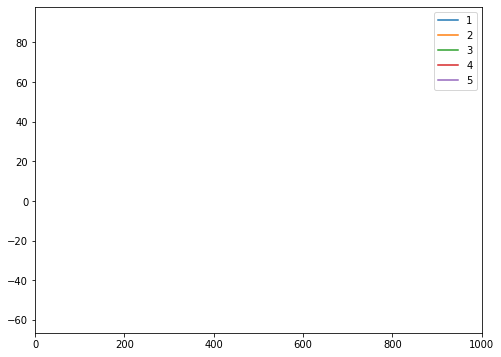

In [122]:
plotTStatistics(matrix_tstat_centroids, matrix_mz, plotRange=(0, 1000))


2632 of 2632
Total field considered 3.0 of 3400
Segment 1 elements 1392 of all 2632 0.5288753799392097
Segment 2 elements 322 of all 2632 0.12234042553191489
Segment 3 elements 784 of all 2632 0.2978723404255319
Segment 4 elements 26 of all 2632 0.009878419452887538
Segment 5 elements 108 of all 2632 0.041033434650455926


<ipython-input-118-15f782dc3e64>:3: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sqSStats)


[PS] 22 26 1 908.0341481267574 6.651047422730704e-198 -1.2740049031016856
[PS] 22 26 2 428.80484822168665 7.695029728198053e-94 -4.201895493801599
[PS] 22 26 3 708.0956296262293 1.7337548810704792e-154 -2.4221805441896
[PS] 22 26 4 26.872559290949127 1.4611603969766042e-06 -9.234805508847451
[PS] 22 26 5 139.76332533237508 4.474860672601241e-31 -6.386736130641976
[PS] 23 27 1 1919.1801433606333 0.0 -1.2740049031016856
[PS] 23 27 2 1179.823789644548 6.375573687525757e-257 -4.201895493801599
[PS] 23 27 3 1622.1596250450473 0.0 -2.4221805441896
[PS] 23 27 4 99.13771363975974 2.9683766651291435e-22 -9.234805508847451
[PS] 23 27 5 642.9560488252484 2.4202929983598264e-140 -6.386736130641976
[PS] 23 28 1 3069.678695454525 0.0 -1.2740049031016856
[PS] 23 28 2 2109.783836651219 0.0 -4.201895493801599
[PS] 23 28 3 2690.351016863155 0.0 -2.4221805441896
[PS] 23 28 4 453.64302293063207 3.109347014910369e-99 -9.234805508847451
[PS] 23 28 5 1362.8063712839798 1.175862456934926e-296 -6.3867361306419

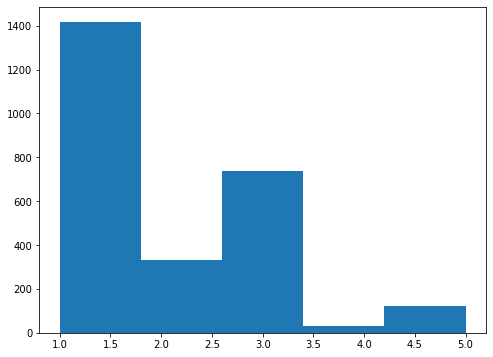

Old segments taken: 0 of 2632


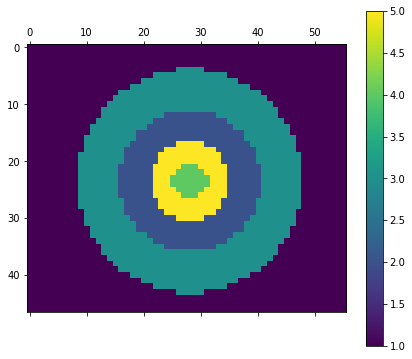

In [123]:

shr_segmented, ams = get_new_clusters_func(shr_segmented, matrix_segments, matrix, matrix_seg_centroids, matrix_shr_centroids, print_area=1, distance_func=distance_tibschirani)

plt.matshow(shr_segmented)
plt.colorbar()

In [124]:
spec.idx2mass[500]

600.0

SegLen 1 368
SegLen 2 414
SegLen 3 130
SegLen 4 83
SegLen 5 311
SegLen 6 215
SegLen 7 190
SegLen 8 218
SegLen 9 336
SegLen 10 367
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         2.39068003 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.0556536657739117
seg centroid [0.         0.         3.77709024 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05287152491582318
seg centroid [0.         0.         2.12405363 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.08984568382529089
seg centroid [0.         0.         0.13686337 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 658.0 of 3400 with s0= 0.0 and m= 0.11148153201679094
seg centroid [0.         0.         3.05348951 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 : 

<ipython-input-113-29675fb0e293>:35: RuntimeWarning: invalid value encountered in double_scalars
  d_ik   = (seg_centroid[mz] - overall_centroid[mz])/(m*(s_list[mz]+s_0))


seg centroid [0.         0.         2.90929504 ... 0.         0.         0.        ]
Selected fields Seg Centroids 10 : 660.0 of 3400 with s0= 0.0 and m= 0.055720147613349154
Selected fields Shr Centroids 1 : 660.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 2 : 660.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 3 : 660.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 4 : 660.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 5 : 660.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 6 : 660.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 7 : 660.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 8 : 660.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 9 : 660.0 of 3400
t stats: (nan, nan, nan, nan, nan, nan)
Selected fields Shr Centroids 10 

<ipython-input-118-15f782dc3e64>:3: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sqSStats)


[PS] 22 26 1 2284.514577841191 0.0 -3.934832708552554
[PS] 22 26 2 1732.6050003152661 0.0 -3.699266637239787
[PS] 22 26 3 3787.4900188535034 0.0 -6.015929683979251
[PS] 22 26 4 3693.056392771712 0.0 -6.91331736929722
[PS] 22 26 5 1595.56283163085 0.0 -4.271412760531947
[PS] 22 26 6 865.0147616041979 1.4602631815074842e-188 -5.00972252863509
[PS] 22 26 7 1139.5124206401658 3.6142802775448074e-248 -5.256950440569443
[PS] 22 26 8 1854.8262564574384 0.0 -4.982008459312238
[PS] 22 26 9 2480.270442613666 0.0 -4.116776264964007
[PS] 22 26 10 1462.886182798162 2.179225e-318 -3.940274888781275


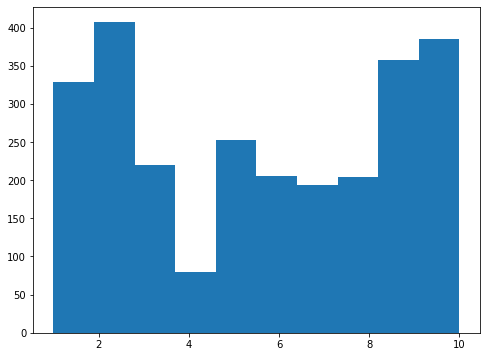

Old segments taken: 0 of 2632
SegLen2 1 368
SegLen2 2 414
SegLen2 3 130
SegLen2 4 83
SegLen2 5 311
SegLen2 6 215
SegLen2 7 190
SegLen2 8 218
SegLen2 9 336
SegLen2 10 367


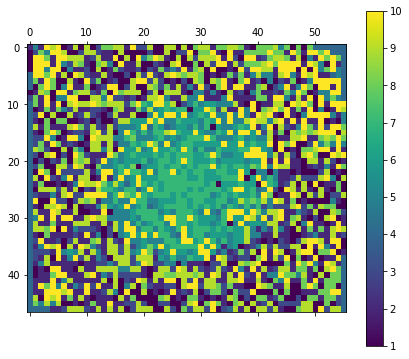

SegLen 1 328
SegLen 2 407
SegLen 3 220
SegLen 4 80
SegLen 5 252
SegLen 6 205
SegLen 7 193
SegLen 8 204
SegLen 9 358
SegLen 10 385
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         2.47490814 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05855527045050105
seg centroid [0.         0.         4.14032895 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05326294834806745
seg centroid [0.         0.         2.47221162 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.0701811495715266
seg centroid [0.         0.         0.13804773 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 655.0 of 3400 with s0= 0.0 and m= 0.11348981985062116
seg centroid [0.        0.        2.9503289 ... 0.        0.        0.       ]
Selected fields Seg Centroids 5 : 658.0 

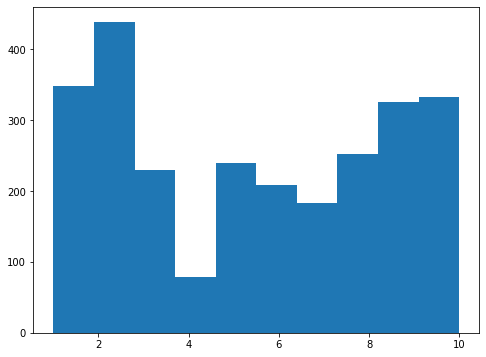

Old segments taken: 0 of 2632
SegLen2 1 328
SegLen2 2 407
SegLen2 3 220
SegLen2 4 80
SegLen2 5 252
SegLen2 6 205
SegLen2 7 193
SegLen2 8 204
SegLen2 9 358
SegLen2 10 385


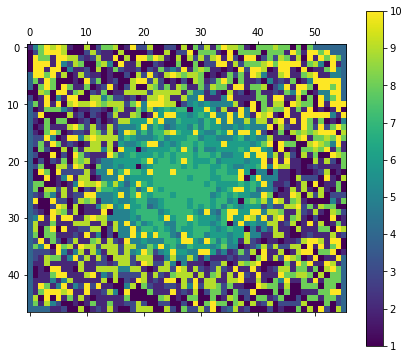

SegLen 1 348
SegLen 2 438
SegLen 3 229
SegLen 4 78
SegLen 5 239
SegLen 6 208
SegLen 7 183
SegLen 8 252
SegLen 9 325
SegLen 10 332
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         2.52427108 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05703948131002989
seg centroid [0.         0.         4.17959954 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05160469196262578
seg centroid [0.         0.         2.54360767 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.06889667217508172
seg centroid [0.         0.         0.09990082 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 655.0 of 3400 with s0= 0.0 and m= 0.11489322012303103
seg centroid [0.         0.         2.54961185 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 :

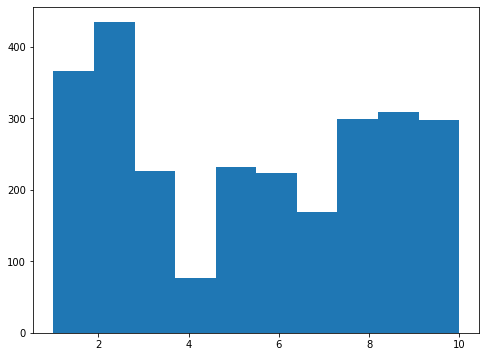

Old segments taken: 0 of 2632
SegLen2 1 348
SegLen2 2 438
SegLen2 3 229
SegLen2 4 78
SegLen2 5 239
SegLen2 6 208
SegLen2 7 183
SegLen2 8 252
SegLen2 9 325
SegLen2 10 332


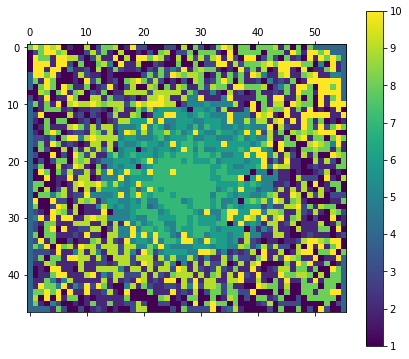

SegLen 1 366
SegLen 2 434
SegLen 3 226
SegLen 4 76
SegLen 5 232
SegLen 6 223
SegLen 7 169
SegLen 8 299
SegLen 9 309
SegLen 10 298
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         2.62032976 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.055786912863904865
seg centroid [0.         0.         4.19055549 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05180817189560187
seg centroid [0.         0.         2.51919007 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.06931607296138746
seg centroid [0.         0.         0.08462743 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 643.0 of 3400 with s0= 0.0 and m= 0.1163521978587794
seg centroid [0.         0.         2.21943212 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 :

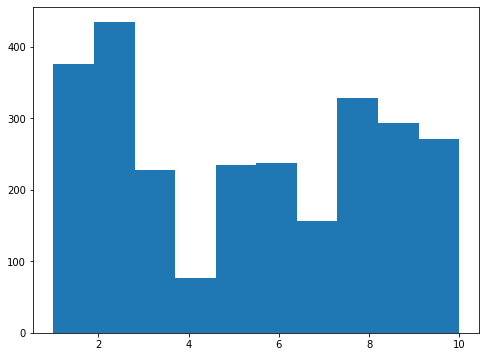

Old segments taken: 0 of 2632
SegLen2 1 366
SegLen2 2 434
SegLen2 3 226
SegLen2 4 76
SegLen2 5 232
SegLen2 6 223
SegLen2 7 169
SegLen2 8 299
SegLen2 9 309
SegLen2 10 298


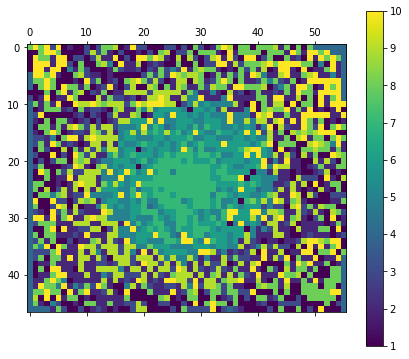

SegLen 1 375
SegLen 2 434
SegLen 3 228
SegLen 4 76
SegLen 5 234
SegLen 6 237
SegLen 7 156
SegLen 8 328
SegLen 9 293
SegLen 10 271
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         2.72052933 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.055196067580880345
seg centroid [0.         0.         4.15000287 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05180817189560187
seg centroid [0.         0.         2.61949803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.06903552796935174
seg centroid [0.         0.         0.08462743 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 643.0 of 3400 with s0= 0.0 and m= 0.1163521978587794
seg centroid [0.         0.         2.07932828 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 :

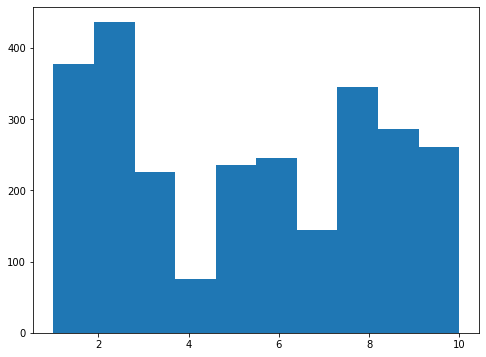

Old segments taken: 0 of 2632
SegLen2 1 375
SegLen2 2 434
SegLen2 3 228
SegLen2 4 76
SegLen2 5 234
SegLen2 6 237
SegLen2 7 156
SegLen2 8 328
SegLen2 9 293
SegLen2 10 271


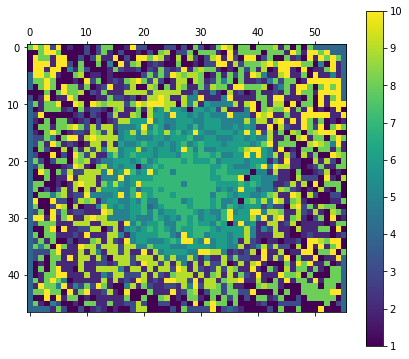

SegLen 1 377
SegLen 2 436
SegLen 3 225
SegLen 4 76
SegLen 5 236
SegLen 6 246
SegLen 7 144
SegLen 8 345
SegLen 9 286
SegLen 10 261
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         2.82433373 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05506776828259565
seg centroid [0.         0.         4.08253835 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05170606532485159
seg centroid [0.         0.         2.63401707 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.0694577832512015
seg centroid [0.         0.         0.08462743 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 643.0 of 3400 with s0= 0.0 and m= 0.1163521978587794
seg centroid [0.         0.         1.99186215 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 : 6

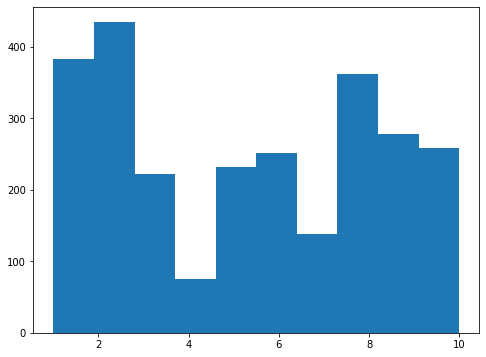

Old segments taken: 0 of 2632
SegLen2 1 377
SegLen2 2 436
SegLen2 3 225
SegLen2 4 76
SegLen2 5 236
SegLen2 6 246
SegLen2 7 144
SegLen2 8 345
SegLen2 9 286
SegLen2 10 261


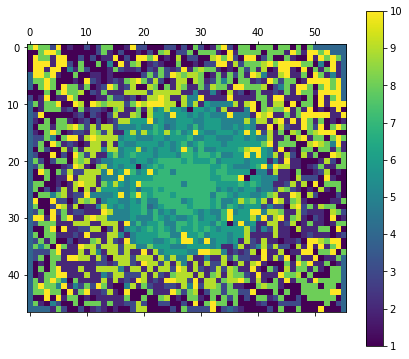

SegLen 1 382
SegLen 2 434
SegLen 3 222
SegLen 4 75
SegLen 5 232
SegLen 6 251
SegLen 7 138
SegLen 8 362
SegLen 9 278
SegLen 10 258
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.       0.       2.874617 ... 0.       0.       0.      ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05475162332613402
seg centroid [0.         0.         4.02386106 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05180817189560187
seg centroid [0.         0.         2.64858417 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.06988879534110563
seg centroid [0.         0.         0.07086186 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 624.0 of 3400 with s0= 0.0 and m= 0.11710368287573102
seg centroid [0.         0.         1.93865521 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 : 659.0 of 34

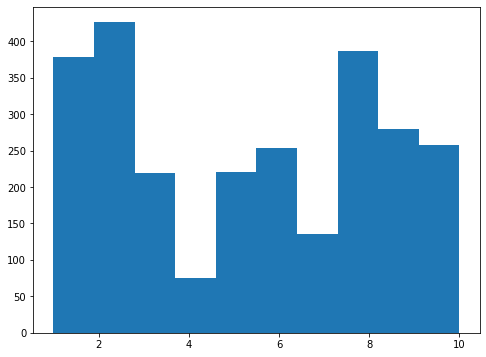

Old segments taken: 0 of 2632
SegLen2 1 382
SegLen2 2 434
SegLen2 3 222
SegLen2 4 75
SegLen2 5 232
SegLen2 6 251
SegLen2 7 138
SegLen2 8 362
SegLen2 9 278
SegLen2 10 258


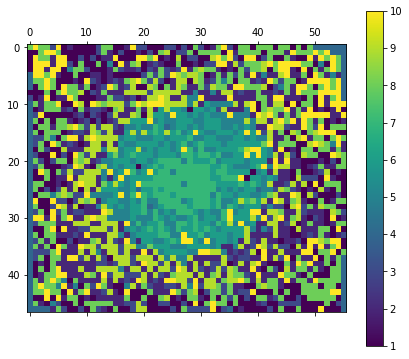

SegLen 1 378
SegLen 2 426
SegLen 3 219
SegLen 4 75
SegLen 5 221
SegLen 6 253
SegLen 7 136
SegLen 8 386
SegLen 9 280
SegLen 10 258
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         2.90226878 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05500401671904598
seg centroid [0.         0.         3.95102731 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.0522241041100949
seg centroid [0.         0.         2.66110544 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07032886502275253
seg centroid [0.         0.         0.07086186 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 624.0 of 3400 with s0= 0.0 and m= 0.11710368287573102
seg centroid [0.         0.         1.90174013 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 : 

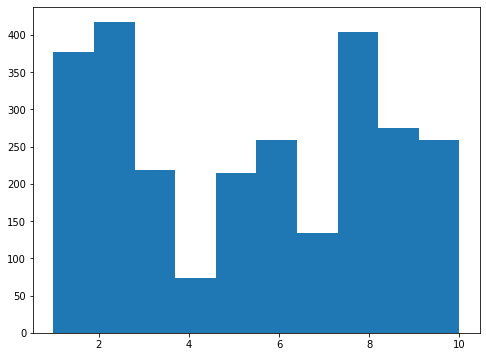

Old segments taken: 0 of 2632
SegLen2 1 378
SegLen2 2 426
SegLen2 3 219
SegLen2 4 75
SegLen2 5 221
SegLen2 6 253
SegLen2 7 136
SegLen2 8 386
SegLen2 9 280
SegLen2 10 258


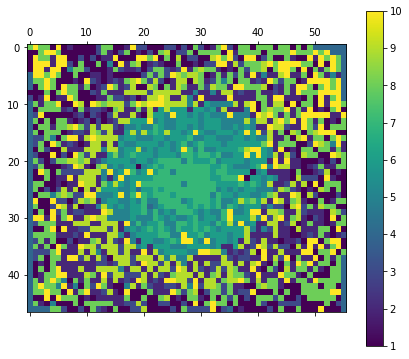

SegLen 1 377
SegLen 2 417
SegLen 3 219
SegLen 4 73
SegLen 5 215
SegLen 6 259
SegLen 7 134
SegLen 8 404
SegLen 9 275
SegLen 10 259
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         2.94877741 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05506776828259565
seg centroid [0.         0.         3.90548044 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.052706932603772585
seg centroid [0.         0.         2.64481854 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07032886502275253
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.        0.        1.8592983 ... 0.        0.        0.       ]
Selected fields Seg Centroids 5 : 659.

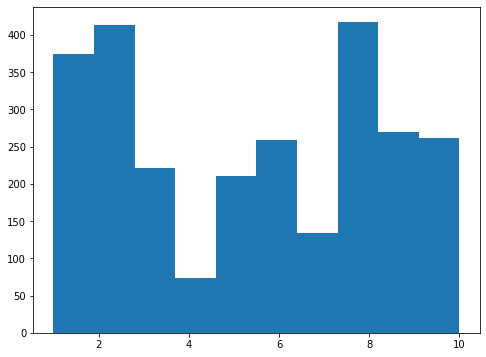

Old segments taken: 0 of 2632
SegLen2 1 377
SegLen2 2 417
SegLen2 3 219
SegLen2 4 73
SegLen2 5 215
SegLen2 6 259
SegLen2 7 134
SegLen2 8 404
SegLen2 9 275
SegLen2 10 259


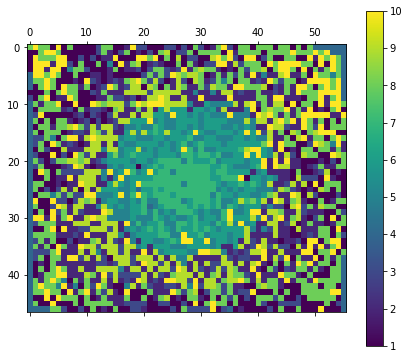

SegLen 1 374
SegLen 2 413
SegLen 3 221
SegLen 4 73
SegLen 5 210
SegLen 6 259
SegLen 7 134
SegLen 8 417
SegLen 9 269
SegLen 10 262
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         2.98436333 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05526061889963135
seg centroid [0.        0.        3.8175987 ... 0.        0.        0.       ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.052926805267082884
seg centroid [0.         0.         2.67833517 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07003446357012023
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         1.83357009 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 : 659.

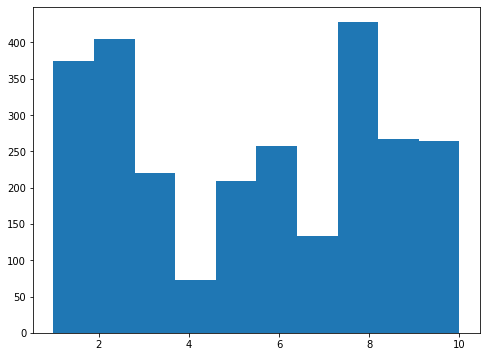

Old segments taken: 0 of 2632
SegLen2 1 374
SegLen2 2 413
SegLen2 3 221
SegLen2 4 73
SegLen2 5 210
SegLen2 6 259
SegLen2 7 134
SegLen2 8 417
SegLen2 9 269
SegLen2 10 262


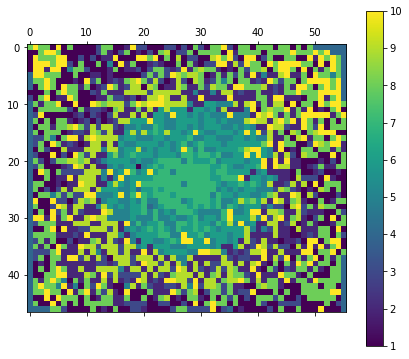

SegLen 1 374
SegLen 2 405
SegLen 3 220
SegLen 4 73
SegLen 5 209
SegLen 6 258
SegLen 7 134
SegLen 8 428
SegLen 9 267
SegLen 10 264
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.02427948 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05526061889963135
seg centroid [0.         0.         3.78634268 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.0533767272525731
seg centroid [0.         0.         2.67243406 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.0701811495715266
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         1.79408911 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 : 6

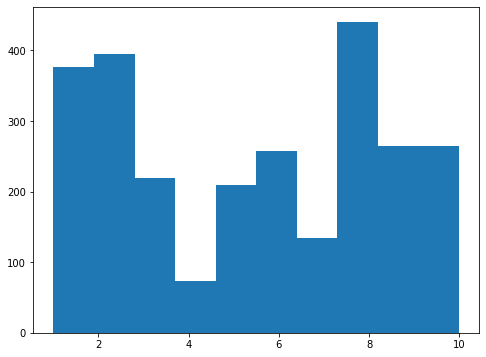

Old segments taken: 0 of 2632
SegLen2 1 374
SegLen2 2 405
SegLen2 3 220
SegLen2 4 73
SegLen2 5 209
SegLen2 6 258
SegLen2 7 134
SegLen2 8 428
SegLen2 9 267
SegLen2 10 264


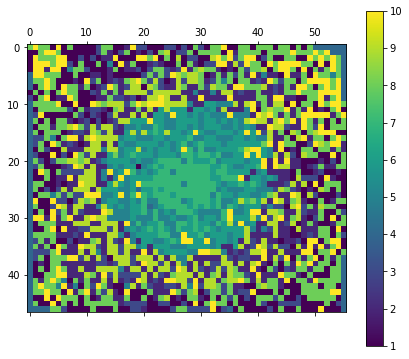

SegLen 1 376
SegLen 2 395
SegLen 3 219
SegLen 4 73
SegLen 5 209
SegLen 6 258
SegLen 7 134
SegLen 8 440
SegLen 9 264
SegLen 10 264
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.05708004 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.055131784641997125
seg centroid [0.         0.         3.78088457 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.053959102840454055
seg centroid [0.         0.         2.65229178 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07032886502275253
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         1.77651545 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5

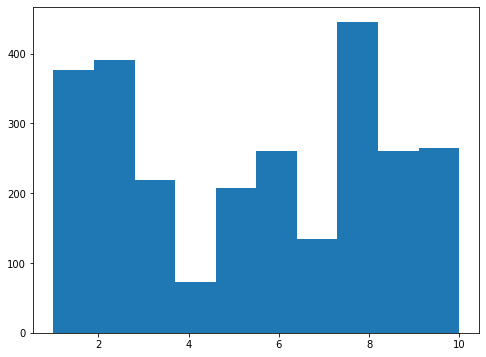

Old segments taken: 0 of 2632
SegLen2 1 376
SegLen2 2 395
SegLen2 3 219
SegLen2 4 73
SegLen2 5 209
SegLen2 6 258
SegLen2 7 134
SegLen2 8 440
SegLen2 9 264
SegLen2 10 264


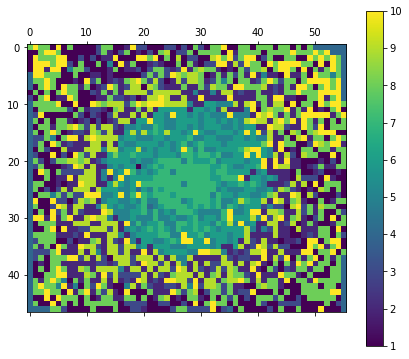

SegLen 1 377
SegLen 2 391
SegLen 3 219
SegLen 4 73
SegLen 5 207
SegLen 6 260
SegLen 7 134
SegLen 8 445
SegLen 9 261
SegLen 10 265
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.06697297 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05506776828259565
seg centroid [0.         0.         3.74498909 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.054198560559849666
seg centroid [0.         0.         2.65229178 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07032886502275253
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         1.77563662 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 

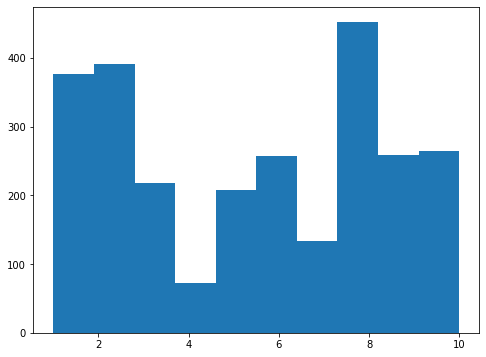

Old segments taken: 0 of 2632
SegLen2 1 377
SegLen2 2 391
SegLen2 3 219
SegLen2 4 73
SegLen2 5 207
SegLen2 6 260
SegLen2 7 134
SegLen2 8 445
SegLen2 9 261
SegLen2 10 265


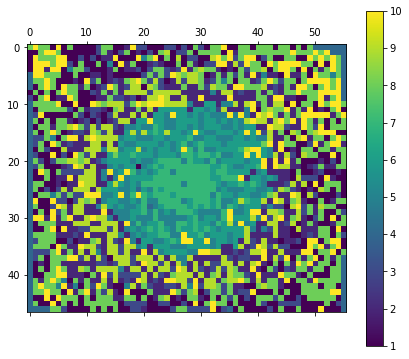

SegLen 1 376
SegLen 2 391
SegLen 3 218
SegLen 4 73
SegLen 5 208
SegLen 6 257
SegLen 7 134
SegLen 8 452
SegLen 9 259
SegLen 10 264
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.06860206 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.055131784641997125
seg centroid [0.         0.         3.73305307 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.054198560559849666
seg centroid [0.         0.         2.64940362 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07047762178897068
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         1.74148838 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5

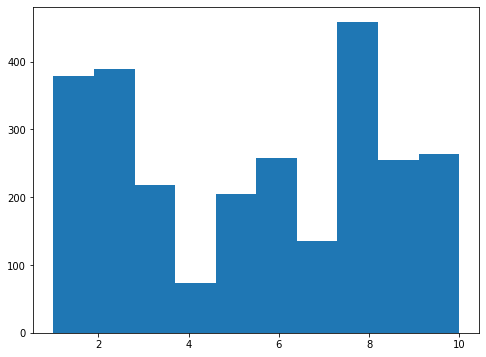

Old segments taken: 0 of 2632
SegLen2 1 376
SegLen2 2 391
SegLen2 3 218
SegLen2 4 73
SegLen2 5 208
SegLen2 6 257
SegLen2 7 134
SegLen2 8 452
SegLen2 9 259
SegLen2 10 264


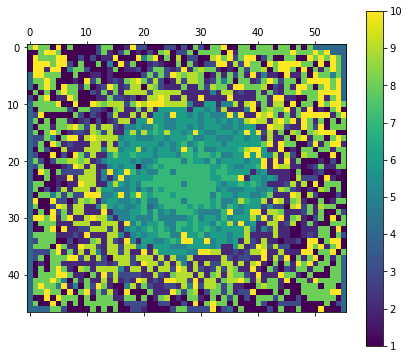

SegLen 1 379
SegLen 2 389
SegLen 3 218
SegLen 4 73
SegLen 5 205
SegLen 6 257
SegLen 7 135
SegLen 8 458
SegLen 9 255
SegLen 10 263
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.07591174 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.054940528184274647
seg centroid [0.         0.         3.71431454 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05431973211577946
seg centroid [0.         0.         2.64940362 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07047762178897068
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.        0.        1.6959953 ... 0.        0.        0.       ]
Selected fields Seg Centroids 5 : 659.

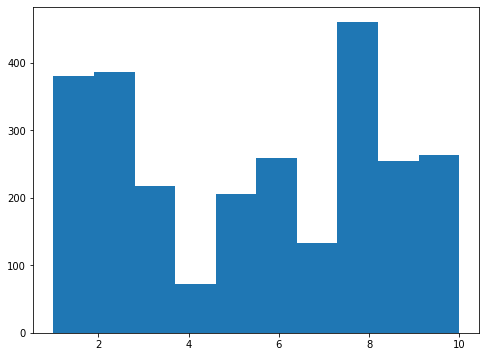

Old segments taken: 0 of 2632
SegLen2 1 379
SegLen2 2 389
SegLen2 3 218
SegLen2 4 73
SegLen2 5 205
SegLen2 6 257
SegLen2 7 135
SegLen2 8 458
SegLen2 9 255
SegLen2 10 263


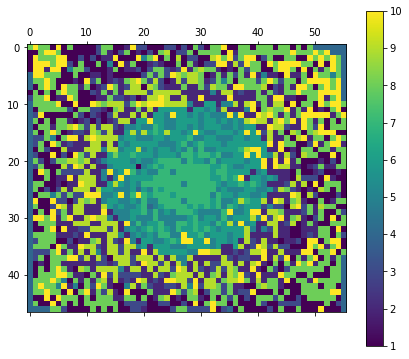

SegLen 1 380
SegLen 2 386
SegLen 3 218
SegLen 4 73
SegLen 5 206
SegLen 6 259
SegLen 7 133
SegLen 8 460
SegLen 9 254
SegLen 10 263
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.        0.        3.0959706 ... 0.        0.        0.       ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05487730092756808
seg centroid [0.         0.         3.69652645 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.054503328199807924
seg centroid [0.         0.         2.64940362 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07047762178897068
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         1.65900244 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 : 659.

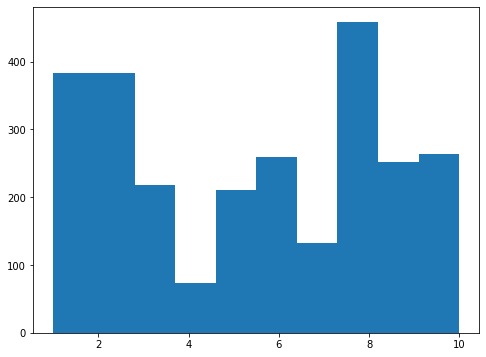

Old segments taken: 0 of 2632
SegLen2 1 380
SegLen2 2 386
SegLen2 3 218
SegLen2 4 73
SegLen2 5 206
SegLen2 6 259
SegLen2 7 133
SegLen2 8 460
SegLen2 9 254
SegLen2 10 263


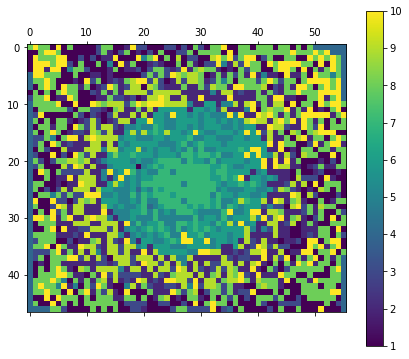

SegLen 1 383
SegLen 2 383
SegLen 3 218
SegLen 4 73
SegLen 5 211
SegLen 6 259
SegLen 7 132
SegLen 8 458
SegLen 9 252
SegLen 10 263
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.10957122 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05468916956004815
seg centroid [0.         0.         3.70184994 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05468916956004815
seg centroid [0.         0.         2.64940362 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07047762178897068
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         1.62798547 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 :

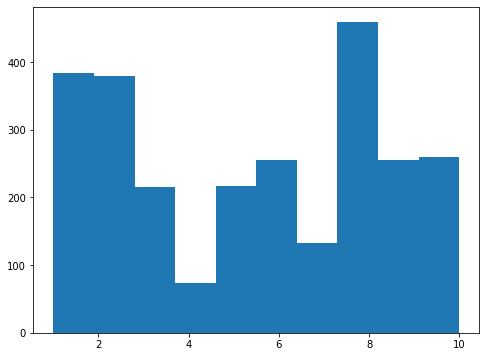

Old segments taken: 0 of 2632
SegLen2 1 383
SegLen2 2 383
SegLen2 3 218
SegLen2 4 73
SegLen2 5 211
SegLen2 6 259
SegLen2 7 132
SegLen2 8 458
SegLen2 9 252
SegLen2 10 263


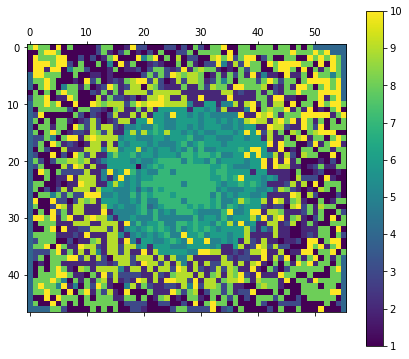

SegLen 1 384
SegLen 2 380
SegLen 3 216
SegLen 4 73
SegLen 5 217
SegLen 6 256
SegLen 7 132
SegLen 8 459
SegLen 9 255
SegLen 10 260
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.11167732 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05462697022893646
seg centroid [0.         0.         3.70325567 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05487730092756808
seg centroid [0.         0.         2.65765348 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07077830768926362
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         1.59794809 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 :

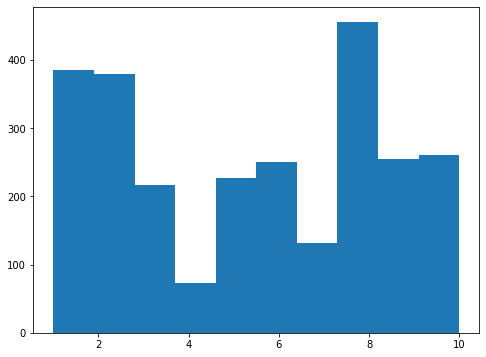

Old segments taken: 0 of 2632
SegLen2 1 384
SegLen2 2 380
SegLen2 3 216
SegLen2 4 73
SegLen2 5 217
SegLen2 6 256
SegLen2 7 132
SegLen2 8 459
SegLen2 9 255
SegLen2 10 260


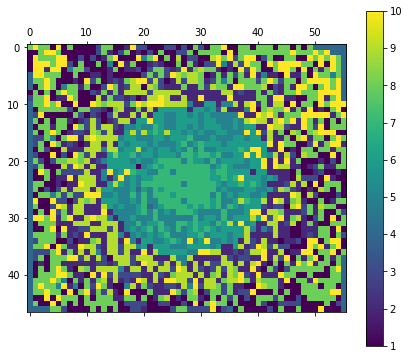

SegLen 1 385
SegLen 2 379
SegLen 3 216
SegLen 4 73
SegLen 5 227
SegLen 6 250
SegLen 7 132
SegLen 8 455
SegLen 9 254
SegLen 10 261
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.11756092 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.054565023661032545
seg centroid [0.         0.         3.69521449 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.054940528184274647
seg centroid [0.         0.         2.65765348 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07077830768926362
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         1.56033905 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5

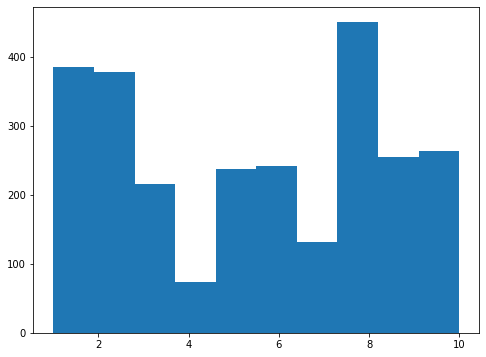

Old segments taken: 0 of 2632
SegLen2 1 385
SegLen2 2 379
SegLen2 3 216
SegLen2 4 73
SegLen2 5 227
SegLen2 6 250
SegLen2 7 132
SegLen2 8 455
SegLen2 9 254
SegLen2 10 261


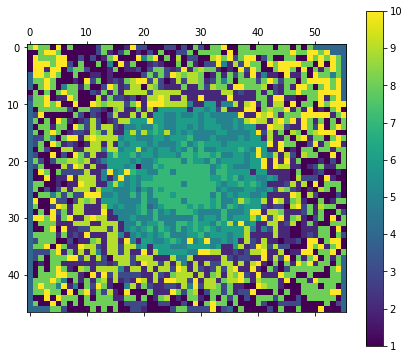

SegLen 1 385
SegLen 2 378
SegLen 3 216
SegLen 4 73
SegLen 5 238
SegLen 6 242
SegLen 7 132
SegLen 8 450
SegLen 9 254
SegLen 10 264
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.11756092 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.054565023661032545
seg centroid [0.         0.         3.69183246 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05500401671904598
seg centroid [0.         0.         2.65765348 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07077830768926362
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         1.51374823 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 

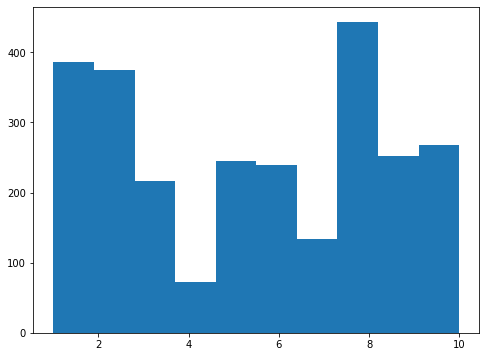

Old segments taken: 0 of 2632
SegLen2 1 385
SegLen2 2 378
SegLen2 3 216
SegLen2 4 73
SegLen2 5 238
SegLen2 6 242
SegLen2 7 132
SegLen2 8 450
SegLen2 9 254
SegLen2 10 264


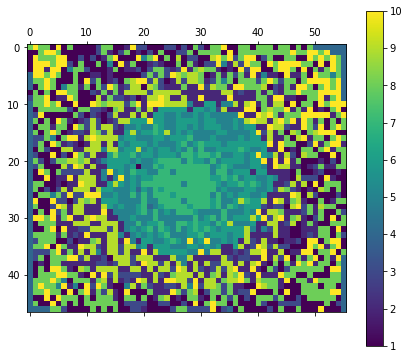

SegLen 1 386
SegLen 2 375
SegLen 3 216
SegLen 4 73
SegLen 5 245
SegLen 6 240
SegLen 7 134
SegLen 8 443
SegLen 9 252
SegLen 10 268
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.11365589 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.054503328199807924
seg centroid [0.         0.         3.70422109 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.055196067580880345
seg centroid [0.         0.         2.65765348 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07077830768926362
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         1.46663724 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5

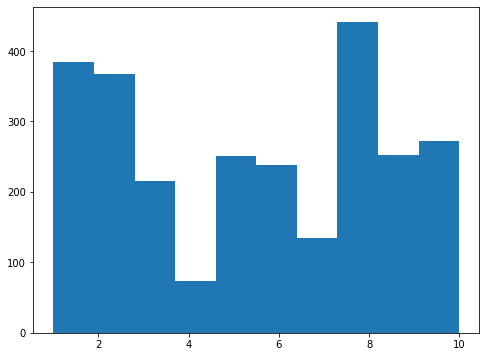

Old segments taken: 0 of 2632
SegLen2 1 386
SegLen2 2 375
SegLen2 3 216
SegLen2 4 73
SegLen2 5 245
SegLen2 6 240
SegLen2 7 134
SegLen2 8 443
SegLen2 9 252
SegLen2 10 268


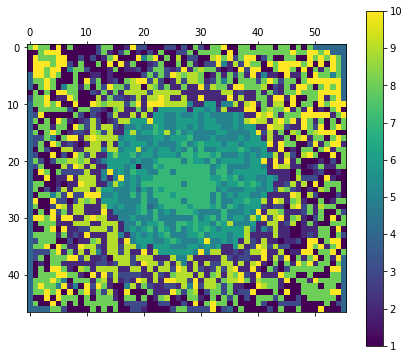

SegLen 1 385
SegLen 2 367
SegLen 3 216
SegLen 4 73
SegLen 5 251
SegLen 6 238
SegLen 7 135
SegLen 8 441
SegLen 9 253
SegLen 10 273
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.11753199 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.054565023661032545
seg centroid [0.         0.         3.71581117 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.055720147613349154
seg centroid [0.         0.         2.65765348 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07077830768926362
seg centroid [0.         0.         0.03603722 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 546.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.        0.        1.4171233 ... 0.        0.        0.       ]
Selected fields Seg Centroids 5 : 660

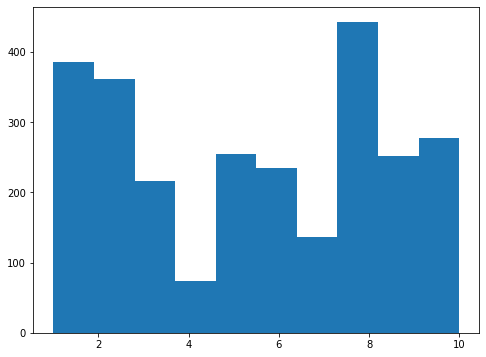

Old segments taken: 0 of 2632
SegLen2 1 385
SegLen2 2 367
SegLen2 3 216
SegLen2 4 73
SegLen2 5 251
SegLen2 6 238
SegLen2 7 135
SegLen2 8 441
SegLen2 9 253
SegLen2 10 273


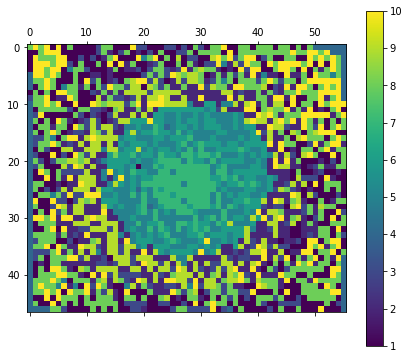

SegLen 1 385
SegLen 2 361
SegLen 3 216
SegLen 4 74
SegLen 5 255
SegLen 6 235
SegLen 7 136
SegLen 8 442
SegLen 9 251
SegLen 10 277
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.11698509 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.054565023661032545
seg centroid [0.         0.         3.73546413 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05612505957430708
seg centroid [0.         0.         2.65765348 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07077830768926362
seg centroid [0.         0.         0.05682717 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 593.0 of 3400 with s0= 0.0 and m= 0.11787049131669876
seg centroid [0.         0.         1.39521369 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 

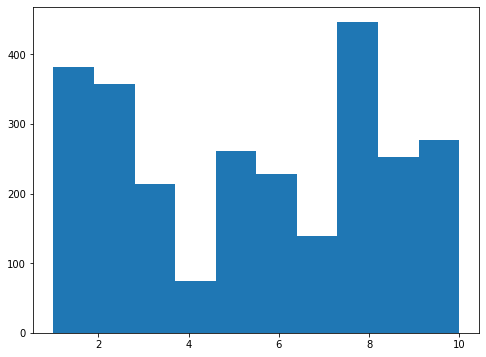

Old segments taken: 0 of 2632
SegLen2 1 385
SegLen2 2 361
SegLen2 3 216
SegLen2 4 74
SegLen2 5 255
SegLen2 6 235
SegLen2 7 136
SegLen2 8 442
SegLen2 9 251
SegLen2 10 277


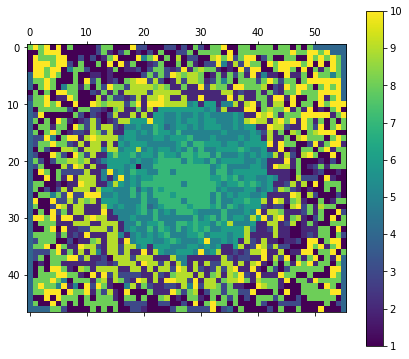

SegLen 1 382
SegLen 2 357
SegLen 3 214
SegLen 4 75
SegLen 5 261
SegLen 6 228
SegLen 7 139
SegLen 8 446
SegLen 9 253
SegLen 10 277
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.12313988 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05475162332613402
seg centroid [0.         0.         3.73993206 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05640088348515221
seg centroid [0.         0.         2.65958459 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07108330609916878
seg centroid [0.         0.         0.07086186 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 624.0 of 3400 with s0= 0.0 and m= 0.11710368287573102
seg centroid [0.         0.         1.37978855 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 :

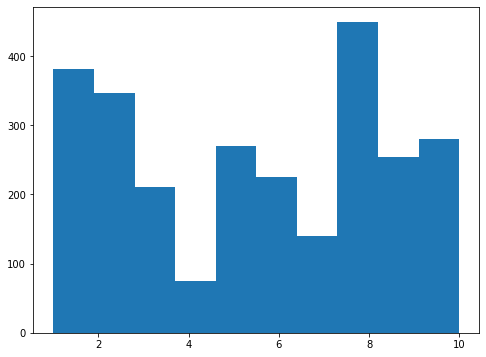

Old segments taken: 0 of 2632
SegLen2 1 382
SegLen2 2 357
SegLen2 3 214
SegLen2 4 75
SegLen2 5 261
SegLen2 6 228
SegLen2 7 139
SegLen2 8 446
SegLen2 9 253
SegLen2 10 277


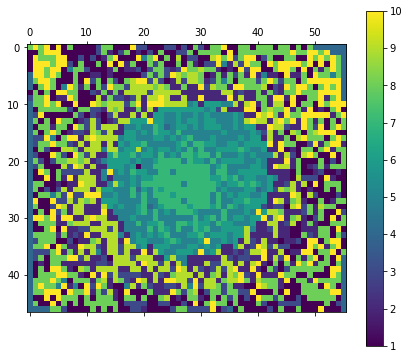

SegLen 1 382
SegLen 2 346
SegLen 3 211
SegLen 4 75
SegLen 5 270
SegLen 6 225
SegLen 7 140
SegLen 8 449
SegLen 9 254
SegLen 10 280
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.14199666 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05475162332613402
seg centroid [0.         0.         3.73689287 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.0571848985321393
seg centroid [0.         0.         2.65923683 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07154911391916352
seg centroid [0.         0.         0.07086186 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 624.0 of 3400 with s0= 0.0 and m= 0.11710368287573102
seg centroid [0.         0.         1.36500054 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 : 

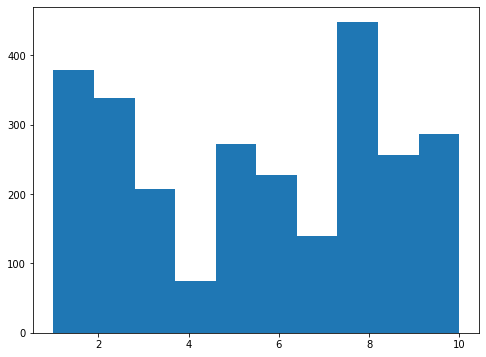

Old segments taken: 0 of 2632
SegLen2 1 382
SegLen2 2 346
SegLen2 3 211
SegLen2 4 75
SegLen2 5 270
SegLen2 6 225
SegLen2 7 140
SegLen2 8 449
SegLen2 9 254
SegLen2 10 280


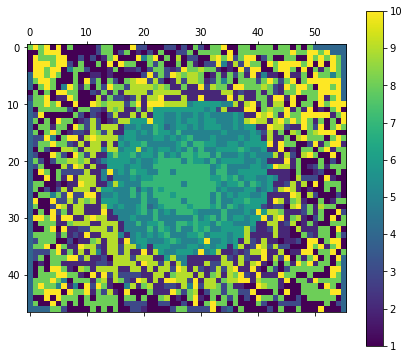

SegLen 1 379
SegLen 2 339
SegLen 3 208
SegLen 4 75
SegLen 5 272
SegLen 6 228
SegLen 7 140
SegLen 8 448
SegLen 9 257
SegLen 10 286
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.14922502 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.054940528184274647
seg centroid [0.         0.         3.75033739 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05770434747140873
seg centroid [0.         0.         2.66559929 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07202521445590254
seg centroid [0.         0.         0.07086186 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 624.0 of 3400 with s0= 0.0 and m= 0.11710368287573102
seg centroid [0.         0.         1.36361538 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 

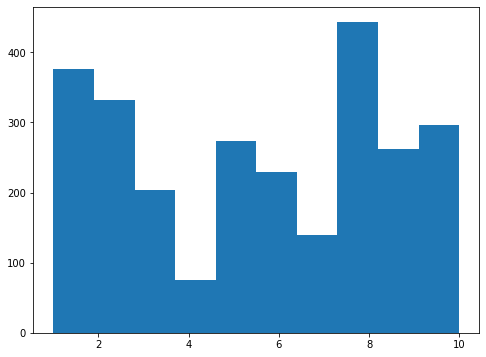

Old segments taken: 0 of 2632
SegLen2 1 379
SegLen2 2 339
SegLen2 3 208
SegLen2 4 75
SegLen2 5 272
SegLen2 6 228
SegLen2 7 140
SegLen2 8 448
SegLen2 9 257
SegLen2 10 286


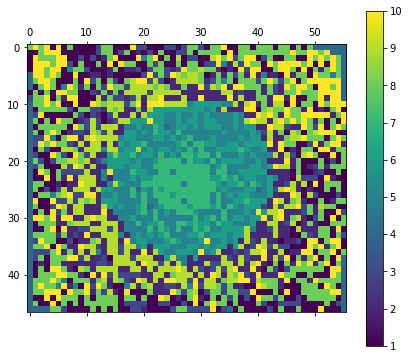

SegLen 1 376
SegLen 2 332
SegLen 3 204
SegLen 4 75
SegLen 5 274
SegLen 6 229
SegLen 7 140
SegLen 8 443
SegLen 9 262
SegLen 10 297
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.15323597 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.055131784641997125
seg centroid [0.         0.         3.75858223 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.058240770964140993
seg centroid [0.         0.         2.65996742 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07267668122610009
seg centroid [0.         0.         0.07086186 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 624.0 of 3400 with s0= 0.0 and m= 0.11710368287573102
seg centroid [0.        0.        1.3664825 ... 0.        0.        0.       ]
Selected fields Seg Centroids 5 : 660

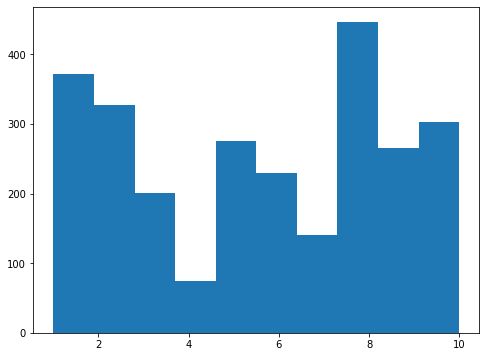

Old segments taken: 0 of 2632
SegLen2 1 376
SegLen2 2 332
SegLen2 3 204
SegLen2 4 75
SegLen2 5 274
SegLen2 6 229
SegLen2 7 140
SegLen2 8 443
SegLen2 9 262
SegLen2 10 297


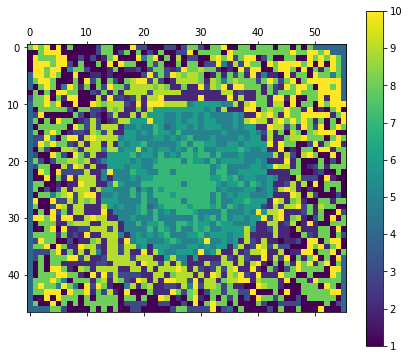

SegLen 1 371
SegLen 2 327
SegLen 3 201
SegLen 4 75
SegLen 5 275
SegLen 6 229
SegLen 7 140
SegLen 8 446
SegLen 9 266
SegLen 10 302
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.15121795 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.055455901394566263
seg centroid [0.         0.         3.76650537 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.058634829114286774
seg centroid [0.         0.         2.66413844 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07317829997913244
seg centroid [0.         0.         0.07086186 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 624.0 of 3400 with s0= 0.0 and m= 0.11710368287573102
seg centroid [0.         0.         1.36151347 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5

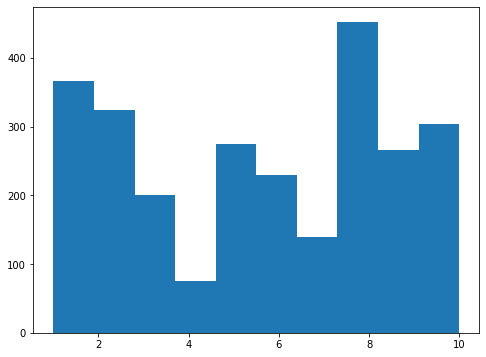

Old segments taken: 0 of 2632
SegLen2 1 371
SegLen2 2 327
SegLen2 3 201
SegLen2 4 75
SegLen2 5 275
SegLen2 6 229
SegLen2 7 140
SegLen2 8 446
SegLen2 9 266
SegLen2 10 302


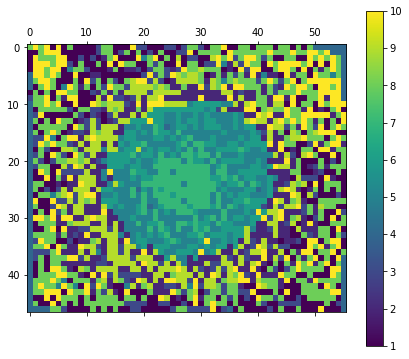

SegLen 1 367
SegLen 2 324
SegLen 3 200
SegLen 4 75
SegLen 5 275
SegLen 6 229
SegLen 7 140
SegLen 8 452
SegLen 9 266
SegLen 10 304
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.16086806 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.055720147613349154
seg centroid [0.         0.         3.77632071 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.058875792672480116
seg centroid [0.         0.         2.66494258 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07334806888887017
seg centroid [0.         0.         0.07086186 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 624.0 of 3400 with s0= 0.0 and m= 0.11710368287573102
seg centroid [0.         0.         1.36151347 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5

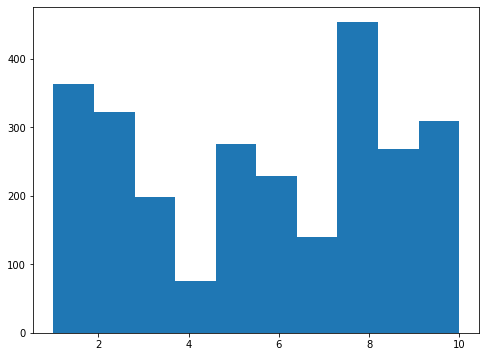

Old segments taken: 0 of 2632
SegLen2 1 367
SegLen2 2 324
SegLen2 3 200
SegLen2 4 75
SegLen2 5 275
SegLen2 6 229
SegLen2 7 140
SegLen2 8 452
SegLen2 9 266
SegLen2 10 304


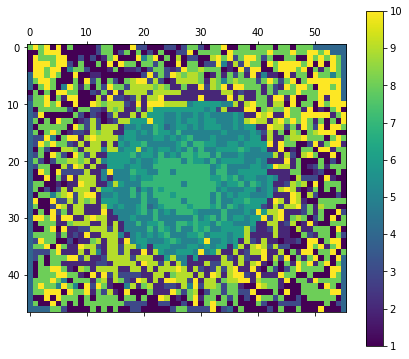

SegLen 1 363
SegLen 2 322
SegLen 3 198
SegLen 4 75
SegLen 5 275
SegLen 6 229
SegLen 7 140
SegLen 8 453
SegLen 9 268
SegLen 10 309
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.16162742 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.05598892878387264
seg centroid [0.        0.        3.7719715 ... 0.        0.        0.       ]
Selected fields Seg Centroids 2 : 660.0 of 3400 with s0= 0.0 and m= 0.05903837118212396
seg centroid [0.         0.         2.67049717 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 659.0 of 3400 with s0= 0.0 and m= 0.07369154809224389
seg centroid [0.         0.         0.07086186 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 624.0 of 3400 with s0= 0.0 and m= 0.11710368287573102
seg centroid [0.         0.         1.36151347 ... 0.         0.         0.        ]
Selected fields Seg Centroids 5 : 660.0

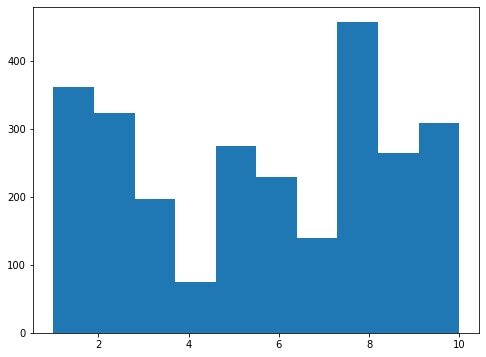

Old segments taken: 0 of 2632
SegLen2 1 363
SegLen2 2 322
SegLen2 3 198
SegLen2 4 75
SegLen2 5 275
SegLen2 6 229
SegLen2 7 140
SegLen2 8 453
SegLen2 9 268
SegLen2 10 309


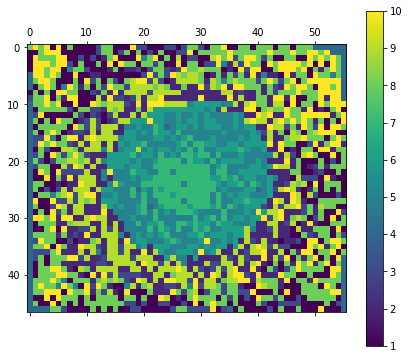

In [158]:
matrix = np.copy(spec.region_array)
matrix_mz = np.copy(spec.idx2mass)
shr_segmented = np.copy(spec.segmented)
res_dic = {0:shr_segmented}

for i in range(30):
    matrix_global_centroid = get_overall_centroid(matrix)
    matrix_segments = get_segments(shr_segmented)

    for x in sorted(matrix_segments):
        print("SegLen", x, len(matrix_segments[x]))

    matrix_seg_centroids = get_seg_centroids(matrix_segments, matrix)
    matrix_shr_centroids, matrix_tstat_centroids = get_shr_centroids(matrix_segments, matrix, matrix_seg_centroids, matrix_global_centroid, delta=0.1)
    
    #plotTStatistics(matrix_tstat_centroids, matrix_mz)
    #plot_segment_centroids(matrix_shr_centroids, matrix_global_centroid, matrix_segments, matrix, matrix_mz, (200, 620), xlim=(-1, 5))

    shr_segmented, ams = get_new_clusters_func(shr_segmented, matrix_segments, matrix, matrix_seg_centroids, matrix_shr_centroids, print_area=0, distance_func=distance_tibschirani)

    for x in sorted(matrix_segments):
        print("SegLen2", x, len(matrix_segments[x]))

    res_dic[i+1] = shr_segmented

    plt.matshow(shr_segmented)
    plt.colorbar()
    plt.show()
    plt.close()

In [160]:
def spectra_dist_sasa(spec1, spec2):
    return np.linalg.norm(spec1-spec2)

def distance_sasa_beta(xpos, npos, matrix, radius, lambda_):

    postFactor = (spectra_dist_sasa(matrix[npos], matrix[xpos]) / lambda_) ** 2

    return 1.0/math.exp(0.25 * postFactor)


def distance_sasa_alpha(matrix, xpos, npos, dpos, radius, lambda_):

    sigma = (2*radius+1)/4.0

    alpha_pre_top = (dpos[0]**2)-(dpos[1]**2)
    alpha_pre_bottom = (2*(sigma**2))

    if alpha_pre_top > 0:
        alpha_pre = math.exp( alpha_pre_top / alpha_pre_bottom )
    else:
        alpha_pre = 1.0 / math.exp( abs(alpha_pre_top) / alpha_pre_bottom )

    alpha_post = distance_sasa_beta(xpos, npos, matrix, radius, lambda_)

    return alpha_pre * alpha_post



def distance_sasa(matrix, pxCoord, centroid, sqSStats, centroidProbability, radius=2):

    allDeltas = []
    for i in range(-radius, radius+1):
        for j in range(-radius, radius+1):
            neighbor = (pxCoord[0]+i, pxCoord[1]+j)

            if neighbor[0] < 0 or neighbor[1] < 0:
                #invalid coord
                # TODO implement some working padding!
                continue
            if neighbor[0] >= matrix.shape[0] or neighbor[1] >= matrix.shape[1]:
                #invalid coord
                # TODO implement some working padding!
                continue

            delta_ij_xy = spectra_dist_sasa(matrix[neighbor], matrix[pxCoord])
            allDeltas.append(delta_ij_xy)



    minDelta = np.min(allDeltas)
    allDeltaHats = [x-minDelta for x in allDeltas]
    lambda_ = 0.5 * np.max(allDeltaHats)

    if lambda_ == 0:
        lambda_ = 1

    distance = 0

    for i in range(-radius, radius+1):
        for j in range(-radius, radius+1):
            neighbor = (pxCoord[0]+i, pxCoord[1]+j)
            dpos = (i,j)

            if neighbor[0] < 0 or neighbor[1] < 0:
                #invalid coord
                # TODO implement some working padding!
                continue
            if neighbor[0] >= matrix.shape[0] or neighbor[1] >= matrix.shape[1]:
                #invalid coord
                # TODO implement some working padding!
                continue


            specDiff = np.linalg.norm(matrix[neighbor]-centroid)
            alpha_ij = distance_sasa_alpha(matrix, pxCoord, neighbor, dpos, radius, lambda_)

            distance += alpha_ij * specDiff    

    return distance

In [ ]:
import random
import numpy as np


def getRandomCentroids(dataSet, k):
    
    foundCentroidCoords = set()
    
    while len(foundCentroidCoords) < k:
        xRand = random.randint(0, dataSet.shape[0]-1)
        yRand = random.randint(0, dataSet.shape[1]-1)
        
        centroid = (xRand, yRand)
        
        if not centroid in foundCentroidCoords:
            foundCentroidCoords.add(centroid)
            
    foundCentroidCoords = sorted(foundCentroidCoords)
    
    initialLabels = np.zeros((dataSet.shape[0], dataSet.shape[1]))
    
    for i in range(0, dataSet.shape[0]):
        for j in range(0, dataSet.shape[1]):
            
            dist2centroid = []
            for cI, coord in enumerate(foundCentroidCoords):
                distScalar = np.linalg.norm(np.array(coord)- np.array([i,j]))
                dist2centroid.append( (cI, distScalar)  )
                
            dist2centroid = sorted(dist2centroid, key=lambda x: x[1])
            initialLabels[i,j] = dist2centroid[0][0]
            
    foundCentroids = defaultdict(list)
    for cI, coord in enumerate(foundCentroidCoords):
        foundCentroids[cI] = dataSet[coord]
        
    return foundCentroids, initialLabels

def shouldStop(oldCentroids, centroids, iterations, maxIter):
    if iterations > maxIter:
        return True
    
    if oldCentroids == None:
        return False
    
    if len(oldCentroids) != len(centroids):
        return False
    
    if sorted([x for x in oldCentroids]) != sorted([x for x in centroids]):
        return False
    
    for x in oldCentroids:
        if list(oldCentroids[x]) != list(centroids[x]):
            return False
    
    return False

def labels2segments(dataSet):
    
    segments = defaultdict(list)    
    for i in range(0, dataSet.shape[0]):
        for j in range(0, dataSet.shape[1]):
            
            segments[dataSet[i,j]].append((i,j))
            
    return segments

def getLabels(dataSet, oldLabels, centroids, distance_func):
    
    matrix_segments = get_segments(oldLabels)
    oldSegments = labels2segments(oldLabels)
    s_list = get_all_s_vec(oldSegments, dataSet, centroids)
    s_0 = np.median(s_list)
    sSum = s_list+s_0
    sSumSq = np.multiply(sSum, sSum)
    n = sum([len(oldSegments[x]) for x in oldSegments])
    
    foundLabels = np.zeros((dataSet.shape[0], dataSet.shape[1]))
    
    for i in range(0, dataSet.shape[0]):
        for j in range(0, dataSet.shape[1]):
            centroidDists = []
            for cI, centroidID in enumerate(centroids):
                
                centroid = centroids[centroidID]                
                cDistance = distance_func(dataSet, (i,j), centroid, sSumSq, len(oldSegments[cI])/n)
                centroidDists.append((cI, cDistance))
                
            centroidDists = sorted(centroidDists, key=lambda x: x[1])
            foundLabels[i,j] = centroidDists[0][0]
            
    return foundLabels

def getCentroids(dataSet, labels):
    
    uniqueCentroids = np.unique(labels)
    
    centroidList = defaultdict(list)
    
    for i in range(0, dataSet.shape[0]):
        for j in range(0, dataSet.shape[1]):
            centroidList[labels[i,j]].append(dataSet[i,j])
            
    centroids = {}
    
    for centroidID in centroidList:
        centroids[centroidID] = np.median(centroidList[centroidID], axis=0)
    
    return centroids

def kmeans(region, k, distance_func, maxIter=10):

    # Initialize centroids randomly
    numFeatures = region.shape[0]*region.shape[1]
    centroids, labels = getRandomCentroids(region, k)
    
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = None
    
    plt.imshow(labels)
    plt.show()
    plt.close()
    
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations, maxIter):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids = centroids
        iterations += 1
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(region, labels, centroids, distance_func)
        
        plt.imshow(labels)
        plt.show()
        plt.close()
        
        # Assign centroids based on datapoint labels
        centroids = getCentroids(region, labels)
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids, labels



In [ ]:
kmeans(np.copy(spec.region_array),
       k=10, maxIter=2,
       distance_func = lambda matrix, pxCoord, centroid, sqSStats, centroidProbability: distance_sasa(matrix, pxCoord, centroid, sqSStats, centroidProbability, radius=2))

In [ ]:
[x for x in range(-1, 2)]

In [ ]:

shr_segmented2, ams = get_new_clusters_func(shr_segmented,
matrix_segments,
matrix,
matrix_seg_centroids,
matrix_shr_centroids,
print_area=1,
distance_func=lambda matrix, pxCoord, centroid, sqSStats, centroidProbability: distance_sasa(matrix, pxCoord, centroid, sqSStats, centroidProbability, radius=1))

plt.matshow(shr_segmented2)
plt.colorbar()

SegLen 1 127
SegLen 2 172
SegLen 3 48
SegLen 4 97
SegLen 5 253
SegLen 6 76
SegLen 7 55
SegLen 8 264
SegLen 9 82
SegLen 10 125
SegLen 11 99
SegLen 12 96
SegLen 13 186
SegLen 14 132
SegLen 15 63
SegLen 16 141
SegLen 17 180
SegLen 18 138
SegLen 19 48
SegLen 20 250
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         2.10702973 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 659.0 of 3400 with s0= 0.0 and m= 0.09085127934023791
seg centroid [0.         0.         3.02318581 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 657.0 of 3400 with s0= 0.0 and m= 0.0787012877791624
seg centroid [0.         0.         0.51789932 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 658.0 of 3400 with s0= 0.0 and m= 0.14564776875414115
seg centroid [0.         0.         3.00226558 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 656.0 of 3400 with s0= 0.0 and m= 0.10338

<ipython-input-113-29675fb0e293>:35: RuntimeWarning: invalid value encountered in double_scalars
  d_ik   = (seg_centroid[mz] - overall_centroid[mz])/(m*(s_list[mz]+s_0))


seg centroid [0.         0.         2.62144694 ... 0.         0.         0.        ]
Selected fields Seg Centroids 11 : 659.0 of 3400 with s0= 0.0 and m= 0.1023765076115441
seg centroid [0.         0.         2.23386116 ... 0.         0.         0.        ]
Selected fields Seg Centroids 12 : 658.0 of 3400 with s0= 0.0 and m= 0.10390671718610453
seg centroid [0.         0.         3.16980635 ... 0.         0.         0.        ]
Selected fields Seg Centroids 13 : 659.0 of 3400 with s0= 0.0 and m= 0.07587017395358962
seg centroid [0.         0.         1.83478375 ... 0.         0.         0.        ]
Selected fields Seg Centroids 14 : 659.0 of 3400 with s0= 0.0 and m= 0.08919471276641917
seg centroid [0.         0.         0.70906262 ... 0.         0.         0.        ]
Selected fields Seg Centroids 15 : 652.0 of 3400 with s0= 0.0 and m= 0.12748707810104645
seg centroid [0.         0.         2.83050374 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 657.0 of 34

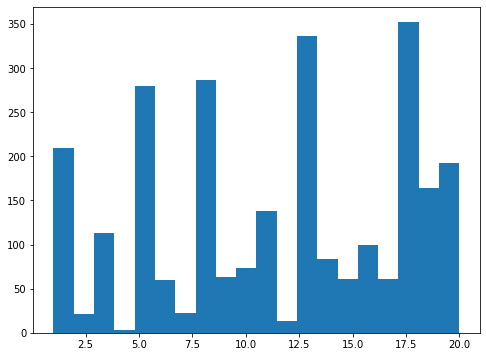

Old segments taken: 0 of 2632
SegLen2 1 127
SegLen2 2 172
SegLen2 3 48
SegLen2 4 97
SegLen2 5 253
SegLen2 6 76
SegLen2 7 55
SegLen2 8 264
SegLen2 9 82
SegLen2 10 125
SegLen2 11 99
SegLen2 12 96
SegLen2 13 186
SegLen2 14 132
SegLen2 15 63
SegLen2 16 141
SegLen2 17 180
SegLen2 18 138
SegLen2 19 48
SegLen2 20 250


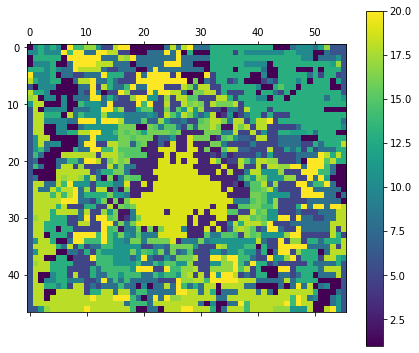

SegLen 1 209
SegLen 2 21
SegLen 3 113
SegLen 4 3
SegLen 5 280
SegLen 6 60
SegLen 7 23
SegLen 8 287
SegLen 9 63
SegLen 10 73
SegLen 11 138
SegLen 12 13
SegLen 13 336
SegLen 14 84
SegLen 15 61
SegLen 16 99
SegLen 17 61
SegLen 18 352
SegLen 19 164
SegLen 20 192
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.21126164 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.07186534773409056
seg centroid [0.         0.         1.67989109 ... 0.         0.         0.        ]
Selected fields Seg Centroids 2 : 634.0 of 3400 with s0= 0.0 and m= 0.2190867107534687
seg centroid [0.         0.         0.71798249 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.09607026976047447
seg centroid [0.         0.         1.71179275 ... 0.         0.         0.        ]
Selected fields Seg Centroids 4 : 468.0 of 3400 with s0= 0.0 and m= 0.57767921

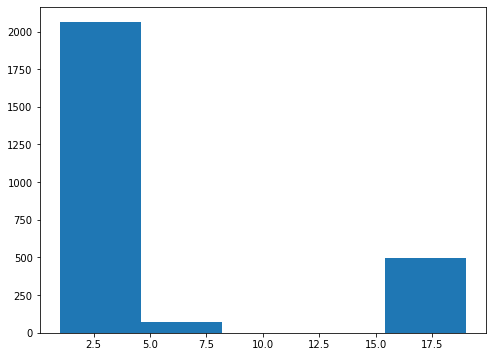

Old segments taken: 0 of 2632
SegLen2 1 209
SegLen2 2 21
SegLen2 3 113
SegLen2 4 3
SegLen2 5 280
SegLen2 6 60
SegLen2 7 23
SegLen2 8 287
SegLen2 9 63
SegLen2 10 73
SegLen2 11 138
SegLen2 12 13
SegLen2 13 336
SegLen2 14 84
SegLen2 15 61
SegLen2 16 99
SegLen2 17 61
SegLen2 18 352
SegLen2 19 164
SegLen2 20 192


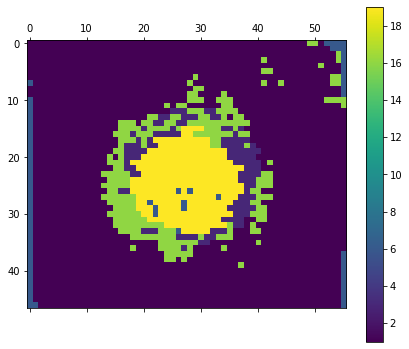

SegLen 1 1939
SegLen 3 123
SegLen 6 73
SegLen 16 242
SegLen 19 255
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.        0.        3.3008873 ... 0.        0.        0.       ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.029927729070770768
seg centroid [0.         0.         0.93847872 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.09224977241456725
seg centroid [0.         0.         0.11090467 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 653.0 of 3400 with s0= 0.0 and m= 0.11865314722632832
seg centroid [0.         0.         2.13409707 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06717269247756205
seg centroid [0.         0.         0.66495596 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 660.0 of 3400 with s0= 0.0 and m= 0.0655858813859921
Selected fie

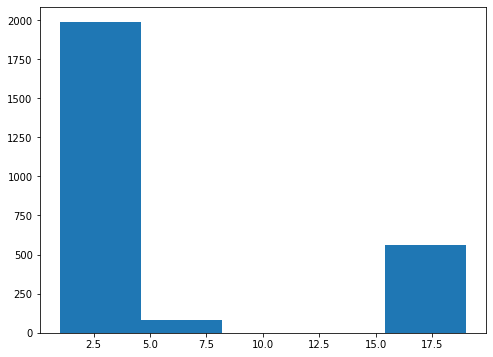

Old segments taken: 0 of 2632
SegLen2 1 1939
SegLen2 3 123
SegLen2 6 73
SegLen2 16 242
SegLen2 19 255


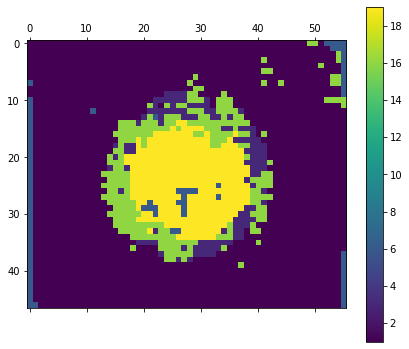

SegLen 1 1866
SegLen 3 120
SegLen 6 84
SegLen 16 249
SegLen 19 313
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.36472783 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.030262929308423833
seg centroid [0.         0.         1.36412303 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.09334491171488554
seg centroid [0.         0.         0.30424511 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 655.0 of 3400 with s0= 0.0 and m= 0.11083637090092921
seg centroid [0.         0.         2.11090312 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06630236396052976
seg centroid [0.         0.         0.69174533 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 660.0 of 3400 with s0= 0.0 and m= 0.059789860249378254
Sele

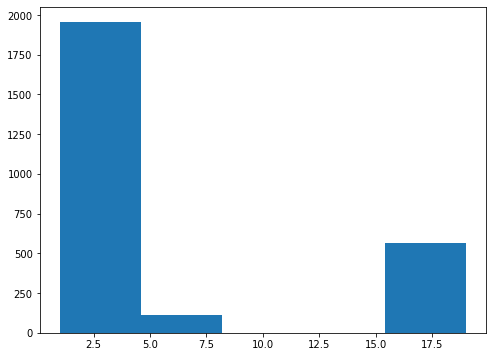

Old segments taken: 0 of 2632
SegLen2 1 1866
SegLen2 3 120
SegLen2 6 84
SegLen2 16 249
SegLen2 19 313


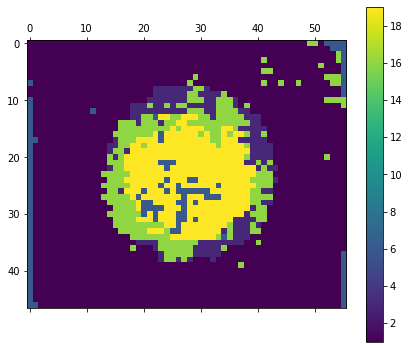

SegLen 1 1803
SegLen 3 152
SegLen 6 114
SegLen 16 248
SegLen 19 315
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.40090883 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.030570743857456478
seg centroid [0.         0.         1.75637935 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.0834199411300889
seg centroid [0.        0.        0.4507247 ... 0.        0.        0.       ]
Selected fields Seg Centroids 6 : 659.0 of 3400 with s0= 0.0 and m= 0.09566540144842255
seg centroid [0.         0.         2.15963336 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06642437259201303
seg centroid [0.         0.         0.71169739 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 660.0 of 3400 with s0= 0.0 and m= 0.05961998309568377
Selected fi

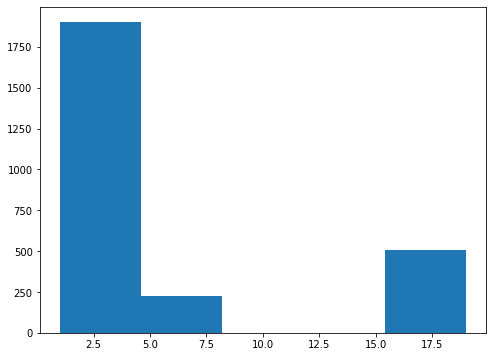

Old segments taken: 0 of 2632
SegLen2 1 1803
SegLen2 3 152
SegLen2 6 114
SegLen2 16 248
SegLen2 19 315


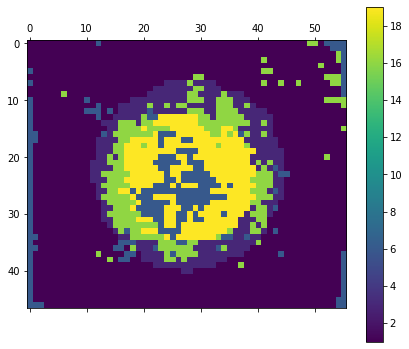

SegLen 1 1630
SegLen 3 271
SegLen 6 225
SegLen 16 230
SegLen 19 276
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.45056204 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.03151882203131617
seg centroid [0.         0.         2.25653913 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.06379636439559426
seg centroid [0.         0.         0.99592073 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.0694577832512015
seg centroid [0.         0.         2.27531537 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06875874705579622
seg centroid [0.         0.         0.82109318 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 660.0 of 3400 with s0= 0.0 and m= 0.0632702743436722
Selecte

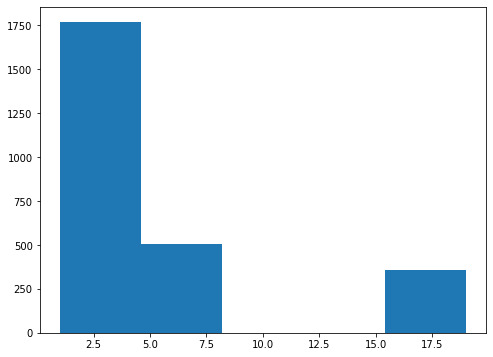

Old segments taken: 0 of 2632
SegLen2 1 1630
SegLen2 3 271
SegLen2 6 225
SegLen2 16 230
SegLen2 19 276


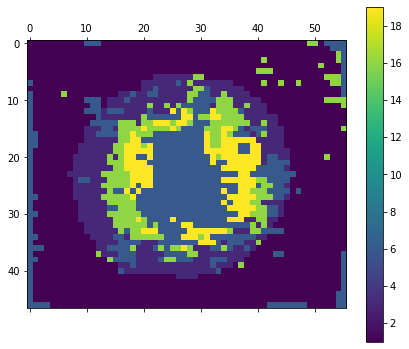

SegLen 1 1415
SegLen 3 353
SegLen 6 505
SegLen 16 206
SegLen 19 153
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.47373976 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.03296442007142203
seg centroid [0.         0.         2.76416374 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.05668157019286025
seg centroid [0.         0.         1.43853164 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.048581243598002144
seg centroid [0.         0.         2.27496996 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.07234851858721973
seg centroid [0.         0.         0.80895948 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 660.0 of 3400 with s0= 0.0 and m= 0.0831618116814728
Selec

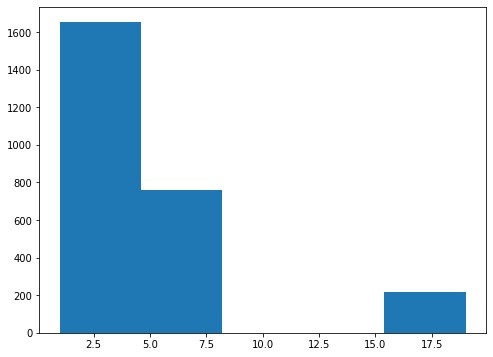

Old segments taken: 0 of 2632
SegLen2 1 1415
SegLen2 3 353
SegLen2 6 505
SegLen2 16 206
SegLen2 19 153


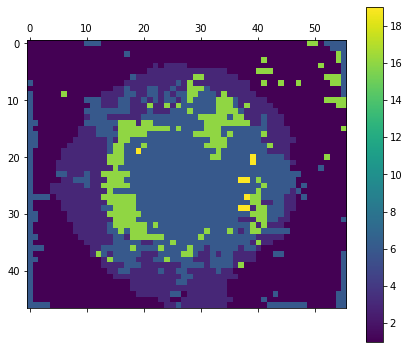

SegLen 1 1167
SegLen 3 486
SegLen 6 762
SegLen 16 209
SegLen 19 8
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.56582807 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.035168696860432246
seg centroid [0.         0.         2.84037896 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.049371574599669434
seg centroid [0.         0.         1.56867854 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.041137272244665096
seg centroid [0.         0.         2.22730712 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.07186534773409056
seg centroid [0.         0.         0.92236026 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 566.0 of 3400 with s0= 0.0 and m= 0.35409029810166565
Sele

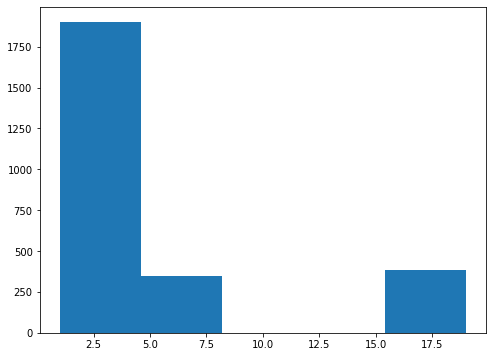

Old segments taken: 0 of 2632
SegLen2 1 1167
SegLen2 3 486
SegLen2 6 762
SegLen2 16 209
SegLen2 19 8


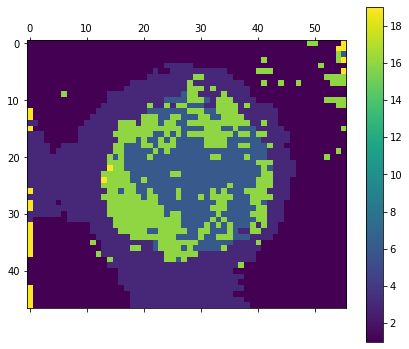

SegLen 1 1207
SegLen 3 693
SegLen 6 347
SegLen 16 362
SegLen 19 23
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.54826002 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.03476261819795297
seg centroid [0.         0.         2.81389711 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.042695909086561054
seg centroid [0.         0.         0.74968317 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.057112026668031154
seg centroid [0.         0.         1.97610007 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.05605684747604848
seg centroid [0.         0.         0.07373144 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 471.0 of 3400 with s0= 0.0 and m= 0.20942349457329676
Sele

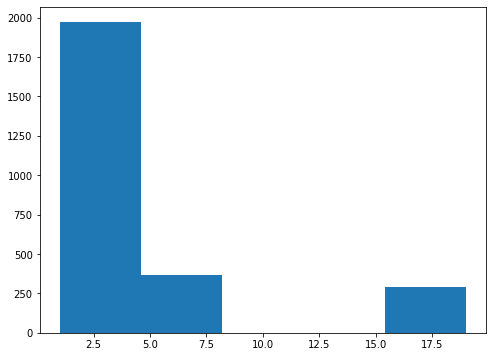

Old segments taken: 0 of 2632
SegLen2 1 1207
SegLen2 3 693
SegLen2 6 347
SegLen2 16 362
SegLen2 19 23


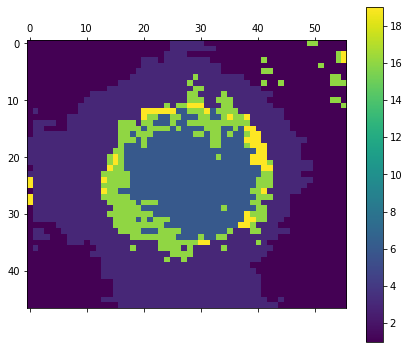

SegLen 1 1006
SegLen 3 965
SegLen 6 369
SegLen 16 240
SegLen 19 52
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.56421042 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.037067168694340735
seg centroid [0.         0.         2.90315082 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.03763254761211706
seg centroid [0.         0.         0.73525015 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05558746540360917
seg centroid [0.         0.         2.06125868 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06742852420447233
seg centroid [0.         0.         1.09267382 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 658.0 of 3400 with s0= 0.0 and m= 0.14003823920806657
Selec

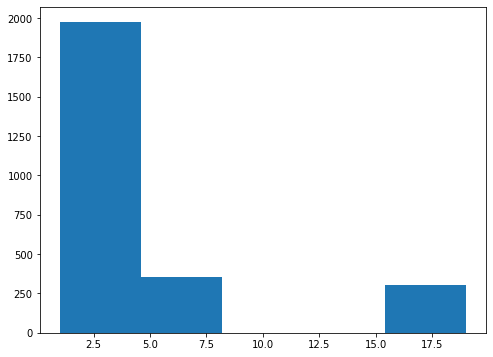

Old segments taken: 0 of 2632
SegLen2 1 1006
SegLen2 3 965
SegLen2 6 369
SegLen2 16 240
SegLen2 19 52


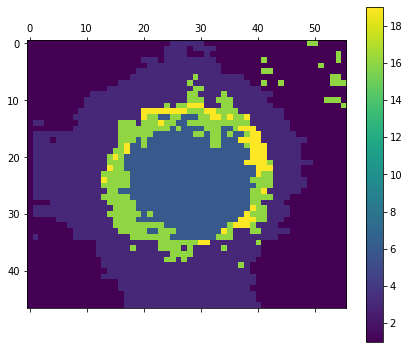

SegLen 1 1080
SegLen 3 894
SegLen 6 357
SegLen 16 239
SegLen 19 62
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.50649702 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.03613675602004654
seg centroid [0.         0.         2.89133765 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.038710559830473085
seg centroid [0.        0.        0.7238317 ... 0.        0.        0.       ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05640088348515221
seg centroid [0.         0.         2.11398344 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06755767630799986
seg centroid [0.         0.         1.20067818 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.12848724243204443
Selected fi

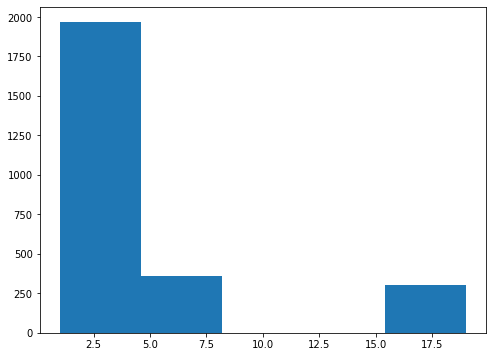

Old segments taken: 0 of 2632
SegLen2 1 1080
SegLen2 3 894
SegLen2 6 357
SegLen2 16 239
SegLen2 19 62


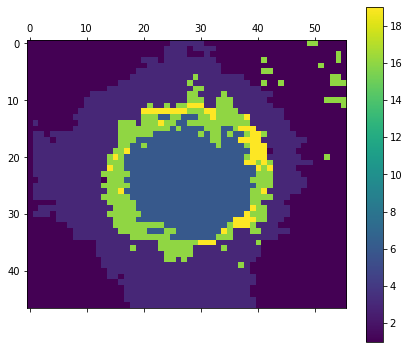

SegLen 1 1095
SegLen 3 872
SegLen 6 360
SegLen 16 248
SegLen 19 57
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.       0.       3.491552 ... 0.       0.       0.      ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.035960828951219465
seg centroid [0.         0.         2.89688019 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.03907336945481068
seg centroid [0.         0.         0.72929925 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05619356713632106
seg centroid [0.         0.         2.13251171 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06642437259201303
seg centroid [0.         0.         1.21447472 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.13387979257098231
Selected fields S

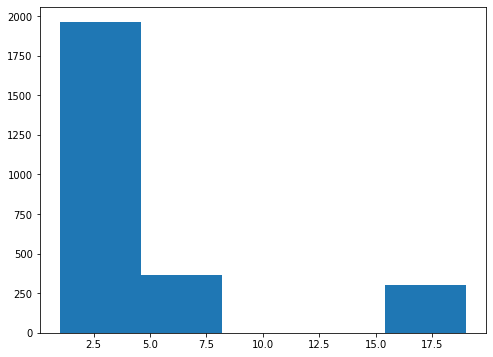

Old segments taken: 0 of 2632
SegLen2 1 1095
SegLen2 3 872
SegLen2 6 360
SegLen2 16 248
SegLen2 19 57


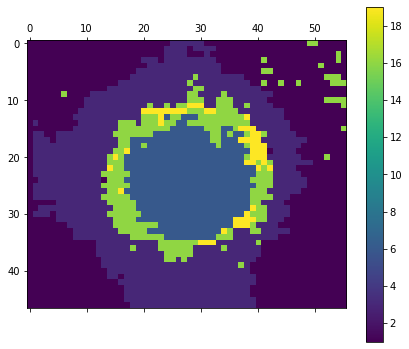

SegLen 1 1092
SegLen 3 869
SegLen 6 367
SegLen 16 248
SegLen 19 56
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48743503 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.035995695929893615
seg centroid [0.         0.         2.89692794 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.0391239976985669
seg centroid [0.         0.         0.75160914 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.055720147613349154
seg centroid [0.         0.         2.18777799 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06642437259201303
seg centroid [0.         0.         1.17581645 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 660.0 of 3400 with s0= 0.0 and m= 0.1350447409819031
Select

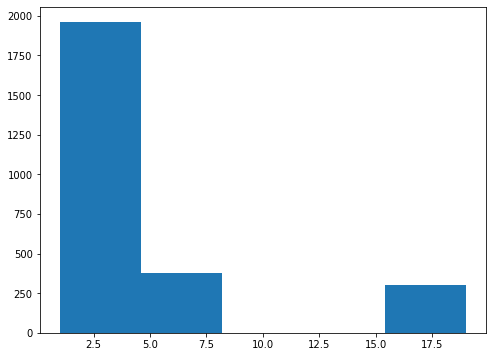

Old segments taken: 0 of 2632
SegLen2 1 1092
SegLen2 3 869
SegLen2 6 367
SegLen2 16 248
SegLen2 19 56


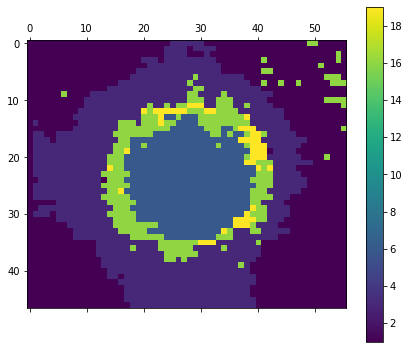

SegLen 1 1092
SegLen 3 867
SegLen 6 374
SegLen 16 246
SegLen 19 53
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48743503 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.035995695929893615
seg centroid [0.         0.         2.89921559 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.03915790785029285
seg centroid [0.        0.        0.7592443 ... 0.        0.        0.       ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05526061889963135
seg centroid [0.         0.         2.21293761 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06667068216339885
seg centroid [0.         0.         1.12689924 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 660.0 of 3400 with s0= 0.0 and m= 0.1387366704877565
Selected fie

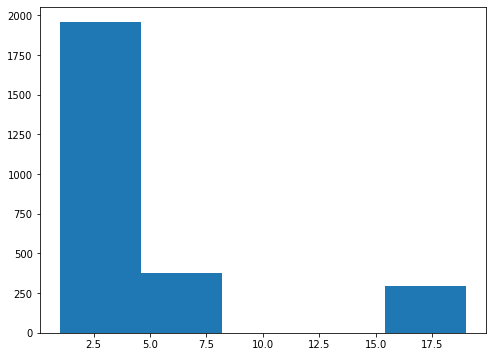

Old segments taken: 0 of 2632
SegLen2 1 1092
SegLen2 3 867
SegLen2 6 374
SegLen2 16 246
SegLen2 19 53


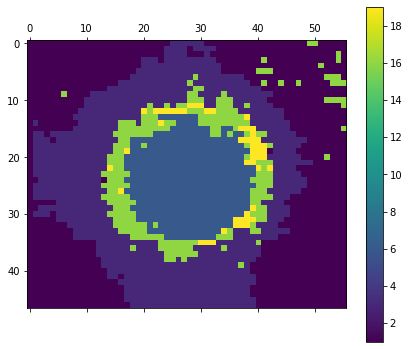

SegLen 1 1089
SegLen 3 868
SegLen 6 379
SegLen 16 245
SegLen 19 51
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.76684301 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.054940528184274647
seg centroid [0.         0.         2.23511586 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06679499878574495
seg centroid [0.         0.         1.12302026 ... 0.         0.         0.        ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14137815371188486
Select

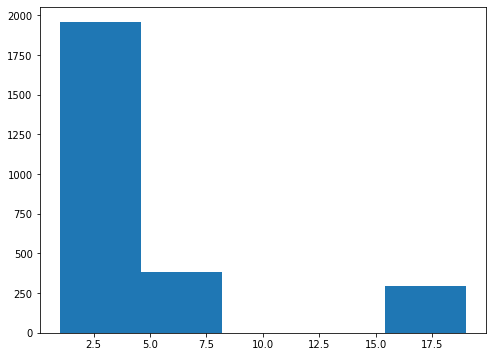

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 379
SegLen2 16 245
SegLen2 19 51


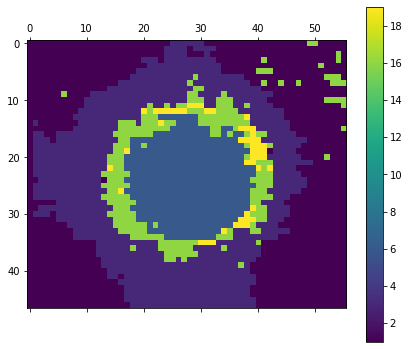

SegLen 1 1091
SegLen 3 866
SegLen 6 380
SegLen 16 245
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48497318 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.03600735333052725
seg centroid [0.         0.         2.90109468 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.03917491060375115
seg centroid [0.         0.         0.76857072 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05487730092756808
seg centroid [0.         0.         2.23511586 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06679499878574495
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fie

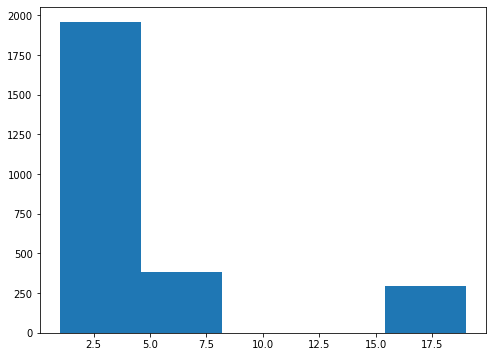

Old segments taken: 0 of 2632
SegLen2 1 1091
SegLen2 3 866
SegLen2 6 380
SegLen2 16 245
SegLen2 19 50


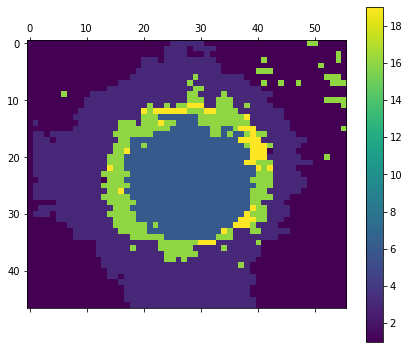

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

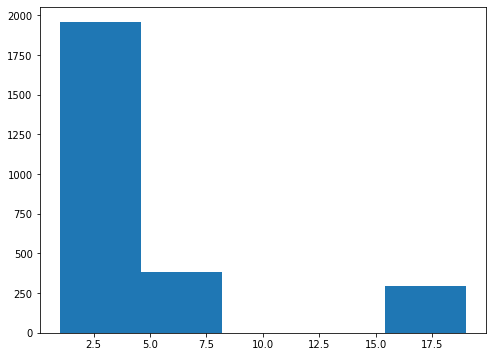

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


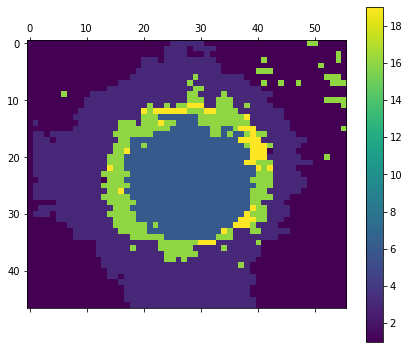

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

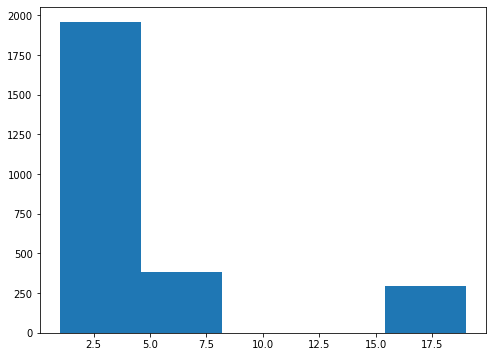

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


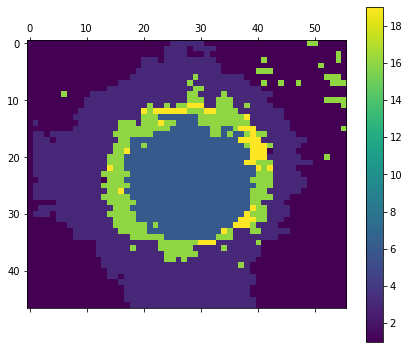

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

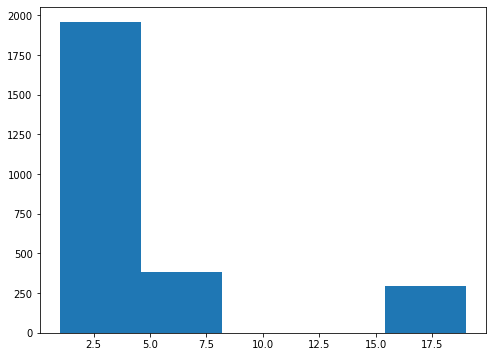

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


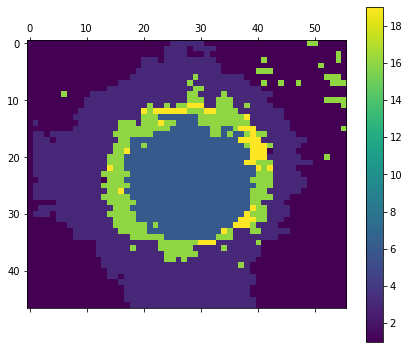

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

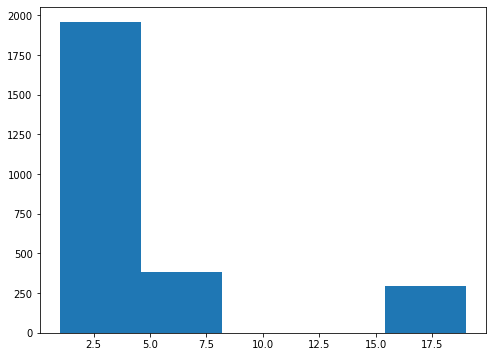

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


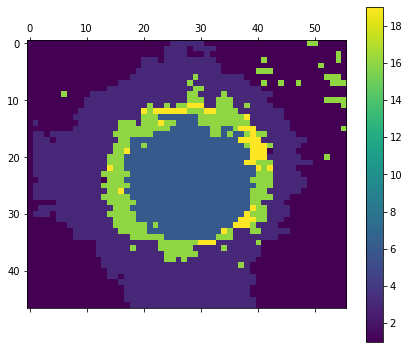

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

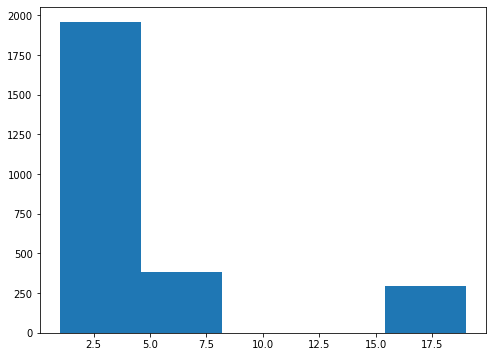

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


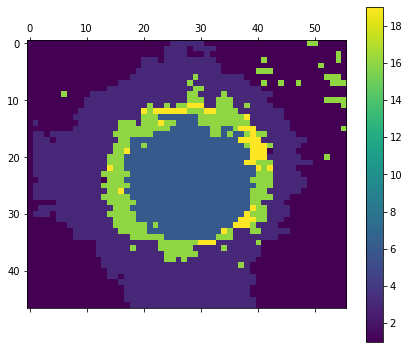

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

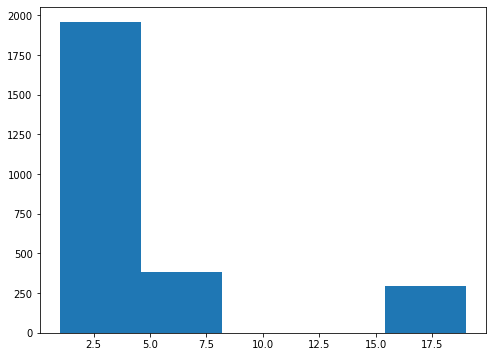

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


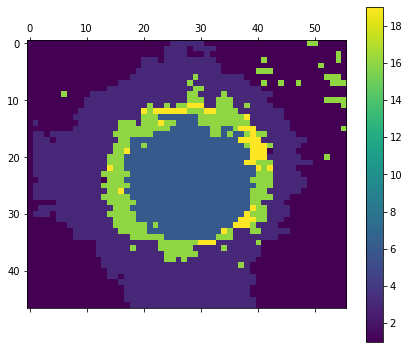

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

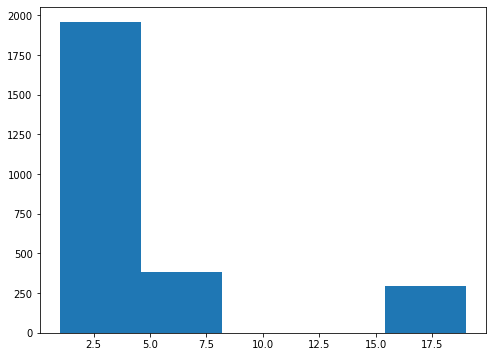

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


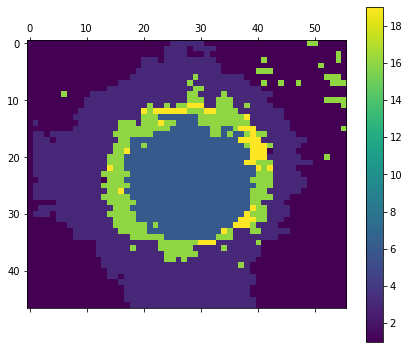

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

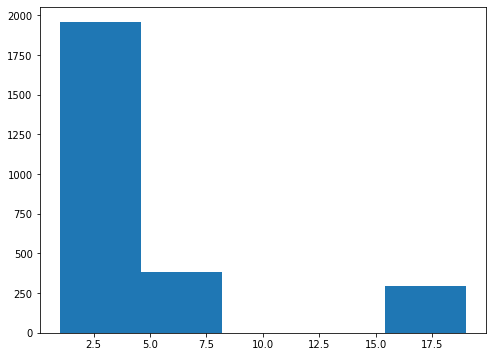

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


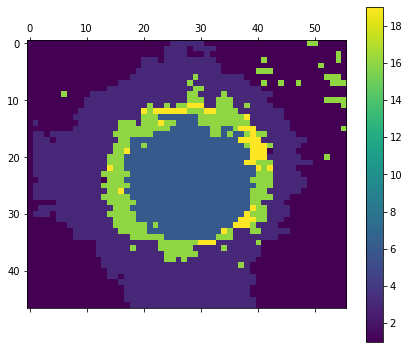

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

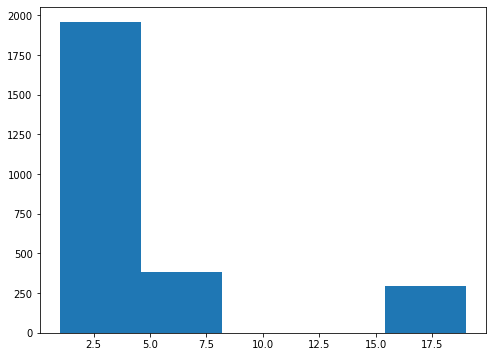

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


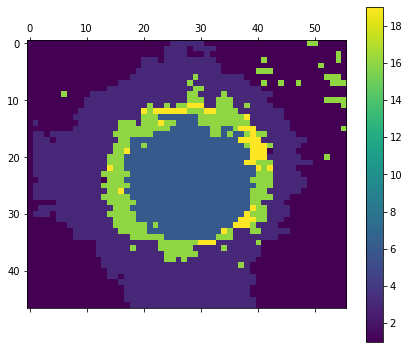

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

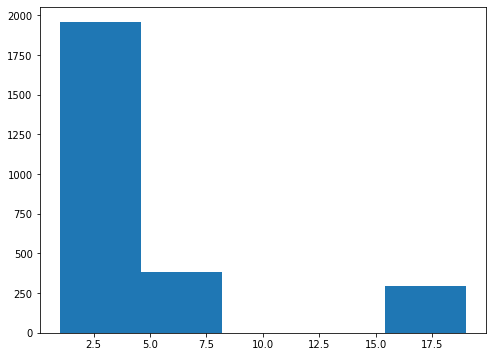

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


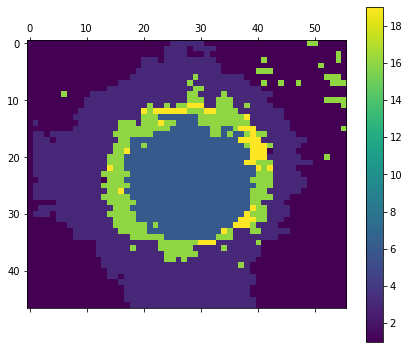

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

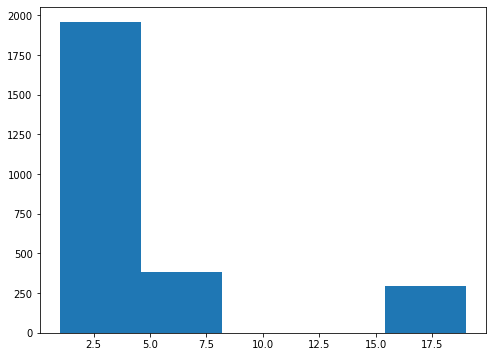

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


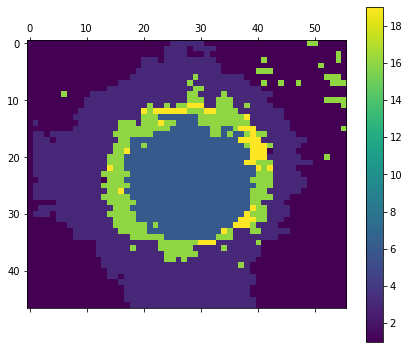

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

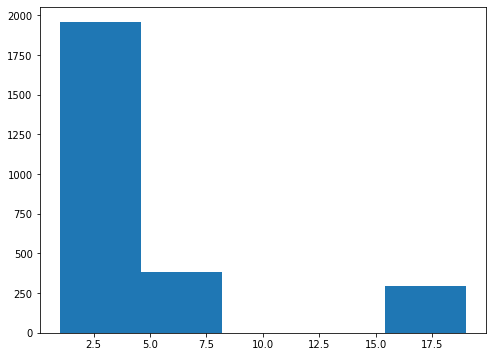

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


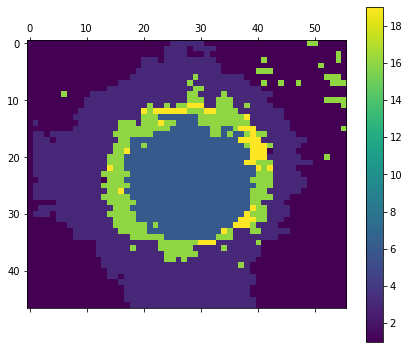

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

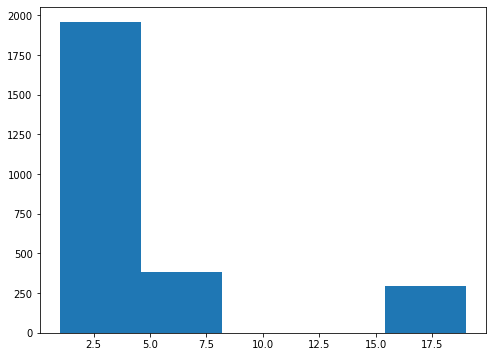

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


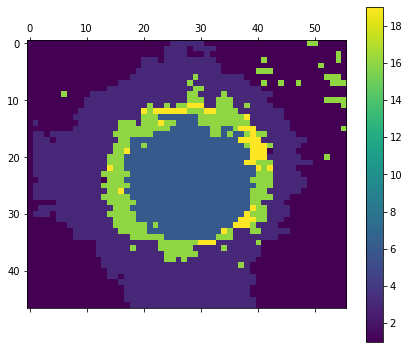

SegLen 1 1089
SegLen 3 868
SegLen 6 381
SegLen 16 244
SegLen 19 50
2632 of 2632
Selected fields OvrAll Centroid: 660.0 of 3400
seg centroid [0.         0.         3.48747192 ... 0.         0.         0.        ]
Selected fields Seg Centroids 1 : 660.0 of 3400 with s0= 0.0 and m= 0.036030720992964
seg centroid [0.         0.         2.89930508 ... 0.         0.         0.        ]
Selected fields Seg Centroids 3 : 660.0 of 3400 with s0= 0.0 and m= 0.039140936913228556
seg centroid [0.         0.         0.77004898 ... 0.         0.         0.        ]
Selected fields Seg Centroids 6 : 660.0 of 3400 with s0= 0.0 and m= 0.05481433321437872
seg centroid [0.         0.         2.23881803 ... 0.         0.         0.        ]
Selected fields Seg Centroids 16 : 660.0 of 3400 with s0= 0.0 and m= 0.06692010060859255
seg centroid [0.        0.        1.1170132 ... 0.        0.        0.       ]
Selected fields Seg Centroids 19 : 659.0 of 3400 with s0= 0.0 and m= 0.14275832448486653
Selected fiel

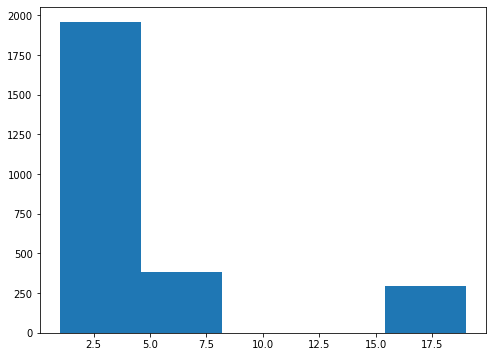

Old segments taken: 0 of 2632
SegLen2 1 1089
SegLen2 3 868
SegLen2 6 381
SegLen2 16 244
SegLen2 19 50


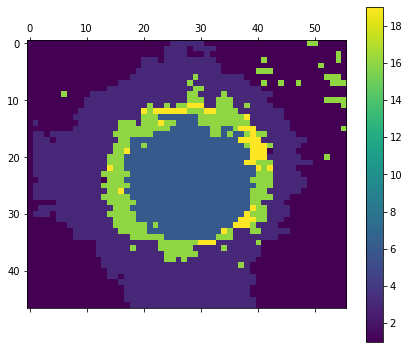

In [166]:
matrix = np.copy(spec.region_array)
matrix_mz = np.copy(spec.idx2mass)

shr_segmented = np.copy(spec.segmented)
res_dic = {0:shr_segmented}

for i in range(30):

    matrix_global_centroid = get_overall_centroid(matrix)
    matrix_segments = get_segments(shr_segmented)

    for x in sorted(matrix_segments):
        print("SegLen", x, len(matrix_segments[x]))

    matrix_seg_centroids = get_seg_centroids(matrix_segments, matrix)
    #matrix_seg_centroids = get_seg_centroids_median(matrix_segments, matrix)

    matrix_shr_centroids, matrix_tstat_centroids = get_shr_centroids(matrix_segments, matrix, matrix_seg_centroids, matrix_global_centroid, delta=20)

    #plot_segment_centroids(matrix_shr_centroids, matrix_global_centroid, matrix_segments, matrix, matrix_mz, (100, 300))

    shr_segmented, ams = get_new_clusters_func(shr_segmented,
        matrix_segments,
        matrix,
        matrix_seg_centroids,
        matrix_shr_centroids,
        print_area=1,
        distance_func=lambda matrix, pxCoord, centroid, sqSStats, centroidProbability: distance_sasa(matrix, pxCoord, 
        centroid, sqSStats, centroidProbability, radius=2))


    for x in sorted(matrix_segments):
        print("SegLen2", x, len(matrix_segments[x]))

    res_dic[i+1] = shr_segmented

    plt.matshow(shr_segmented)
    plt.colorbar()
    plt.show()
    plt.close()

    